In [9]:
import pandas as pd
import numpy as np
import torch
import os
import sys
from tqdm import tqdm, trange

from sdv.single_table import CTGANSynthesizer

from bikebench.design_evaluation.design_evaluation import *
from bikebench.resource_utils import models_and_scalers_path
from bikebench.data_loading import data_loading
from bikebench.design_evaluation.scoring import *
from bikebench.transformation.one_hot_encoding import ONE_HOT_ENCODED_BIKEBENCH_COLUMNS, BOOLEAN_COLUMNS, encode_to_continuous

We use the full dataset for synthetic data generation:

In [ ]:
data_train = data_loading.load_bike_bench_mixed_modality_train()
data_test = data_loading.load_bike_bench_mixed_modality_test()
data = pd.concat([data_train, data_test], axis=0)

(3046, 67)
(762, 67)


In [11]:
import sdv
from sdv.metadata import Metadata  
metadata = Metadata.detect_from_dataframe(
    data=data,
    table_name='my_table'
)

categorical_cols = ONE_HOT_ENCODED_BIKEBENCH_COLUMNS
boolean_cols = BOOLEAN_COLUMNS
continuous_cols = data.columns.difference(categorical_cols + boolean_cols).tolist()

In [12]:
print("Categorical columns:", categorical_cols)
print("Boolean columns:", boolean_cols)
print("Continuous columns:", continuous_cols)

Categorical columns: ['MATERIAL', 'Head tube type', 'RIM_STYLE front', 'RIM_STYLE rear', 'Handlebar style', 'Stem kind', 'Fork type', 'Seat tube type']
Boolean columns: ['bottle SEATTUBE0 show', 'bottle DOWNTUBE0 show', 'BELTorCHAIN', 'SEATSTAYbrdgCheck', 'CHAINSTAYbrdgCheck']
Continuous columns: ['BB diameter', 'BB length', 'BB textfield', 'CHAINSTAYbrdgdia1', 'CHAINSTAYbrdgshift', 'CS textfield', 'Chain stay position on BB', 'DT Length', 'Display AEROBARS', 'Down tube type', 'Dropout spacing', 'FDBSD', 'FIRST color B_RGB', 'FIRST color G_RGB', 'FIRST color R_RGB', 'FORK0R', 'Front Fender include', 'Head angle', 'Head tube length textfield', 'Head tube lower extension2', 'Head tube upper extension2', 'Number of chainrings', 'Number of cogs', 'RDBSD', 'Rear Fender include', 'SBLADEW front', 'SBLADEW rear', 'SEATSTAYbrdgdia1', 'SEATSTAYbrdgshift', 'SPOKES composite front', 'SPOKES composite rear', 'SSTopZOFFSET', 'Saddle height', 'Saddle length', 'Seat angle', 'Seat stay junction0', 'Se

In [13]:
data[continuous_cols] = data[continuous_cols].astype(np.float32)

In [6]:
# for col in data.columns:
#     if col not in categorical_cols and col not in boolean_cols:
#         data[col] = data[col] + np.ones_like(data[col])
#         #make float
#         data[col] = data[col].astype(float)

In [ ]:
synthesizer = CTGANSynthesizer(metadata, verbose=True, epochs=500)
synthesizer.fit(data)

In [ ]:
save_path = models_and_scalers_path("CTGAN.pkl")

In [ ]:
synthesizer.save(save_path)

In [ ]:
synthesizer = CTGANSynthesizer.load(filepath=save_path)


/home/mileva/mambaforge/envs/bike-bench-cuda/lib/python3.10/site-packages/sdv/_utils.py:500: FutureWarning: The 'load' function will be deprecated in future versions of SDV. Please use 'utils.load_synthesizer' instead.
  warnings.warn(


In [ ]:
synthetic_collapsed = synthesizer.sample(num_rows=10000)

In [ ]:
synthetic_collapsed

,Seatpost LENGTH,CS textfield,BB textfield,Stack,Head angle,Head tube length textfield,Seat stay junction0,Seat tube length,Seat angle,DT Length,...,RIM_STYLE rear,SPOKES composite front,SPOKES composite rear,SBLADEW front,SBLADEW rear,Saddle length,Saddle height,Seat tube type,Head tube type,Down tube type
0,304.268829,542.628723,66.297287,616.104614,74.388885,94.415840,31.477945,714.556213,73.506729,652.306702,...,SPOKED,1.0,1.0,50.599998,79.900002,276.791656,715.451721,1,1,0.0
1,326.118500,414.483063,73.088539,549.939575,78.062653,223.243195,49.788227,470.388794,75.169289,645.928284,...,SPOKED,1.0,1.0,79.900002,80.300003,302.684692,718.024475,1,0,0.0
2,299.069550,403.610352,62.072090,569.002014,72.075569,173.267517,68.682770,536.568970,76.856705,703.859863,...,SPOKED,1.0,1.0,80.300003,80.099998,281.089844,765.614624,1,1,1.0
3,328.813538,394.994751,82.136719,574.000671,71.636070,148.456512,44.956860,495.573486,74.110947,614.433167,...,SPOKED,1.0,1.0,51.599998,80.099998,278.501190,732.449341,1,1,2.0
4,325.642456,400.272552,8.068326,742.823730,72.884644,193.275284,44.642151,708.567749,74.333748,746.413574,...,SPOKED,1.0,1.0,79.500000,80.300003,303.333984,784.319702,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,411.376953,398.411346,67.412605,727.147461,68.643913,131.442703,62.347176,616.902161,72.964157,592.100098,...,SPOKED,1.0,1.0,79.599998,80.199997,277.329285,883.387268,1,1,1.0
9996,305.209747,438.636688,41.309975,586.887085,75.064835,100.937111,41.033478,490.743652,73.519165,860.629150,...,SPOKED,1.0,1.0,79.900002,80.199997,280.306335,628.125854,1,1,1.0
9997,297.435089,486.526855,65.898369,542.817078,73.180023,150.468399,43.122452,659.536926,74.267464,676.011475,...,SPOKED,1.0,1.0,80.099998,80.000000,280.664948,707.525879,1,3,2.0
9998,320.734436,415.573547,67.179298,521.997681,73.387772,179.893311,48.365120,587.093506,74.168037,685.744141,...,DISC,1.0,1.0,80.000000,80.199997,302.162781,932.596924,0,3,0.0


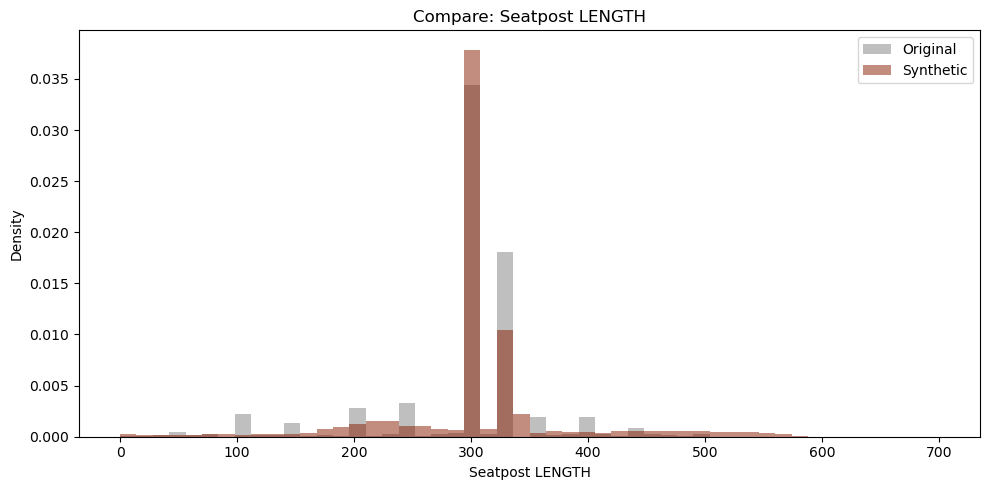

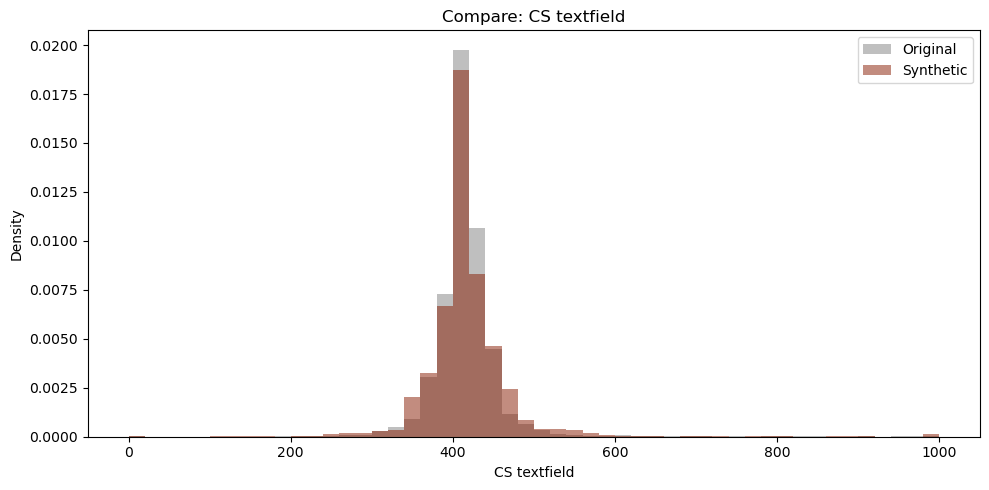

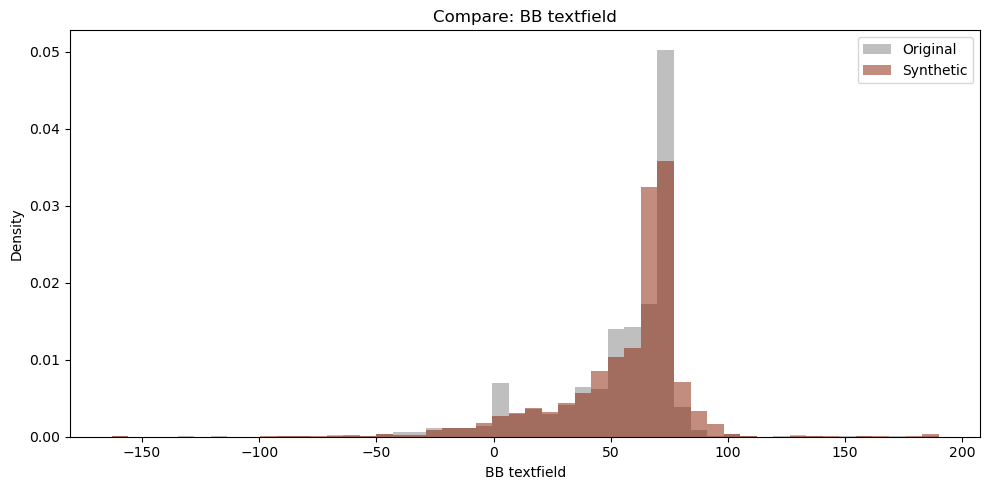

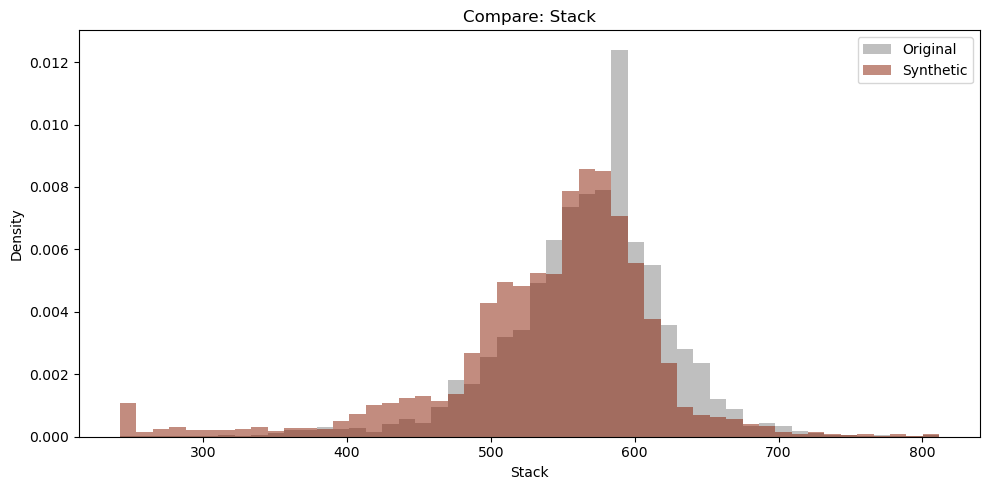

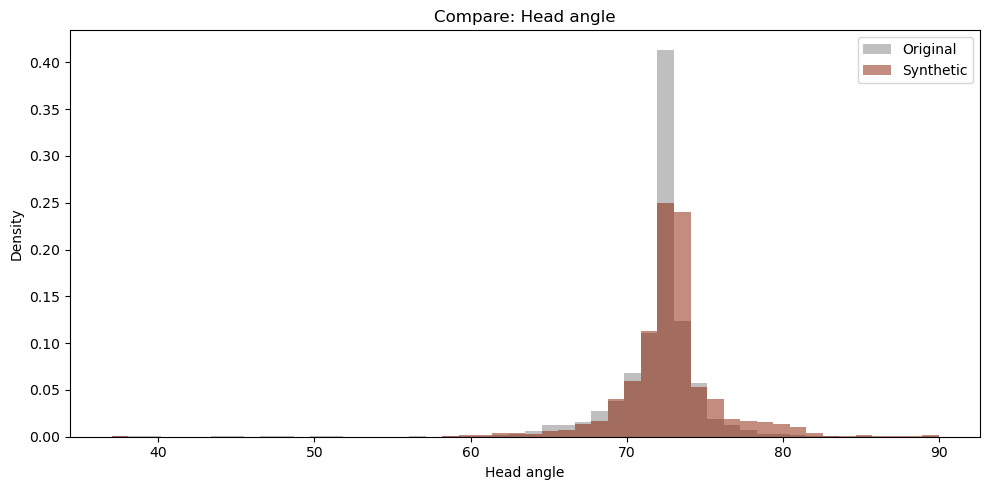

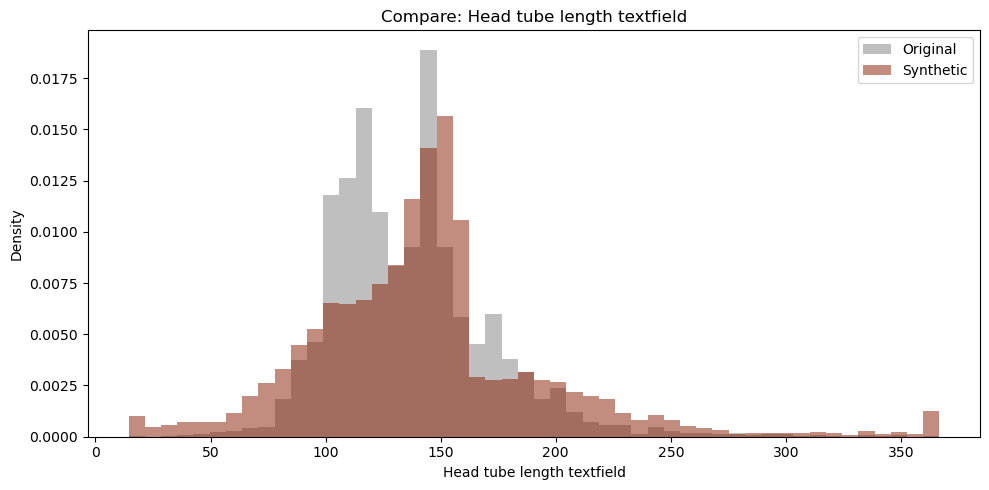

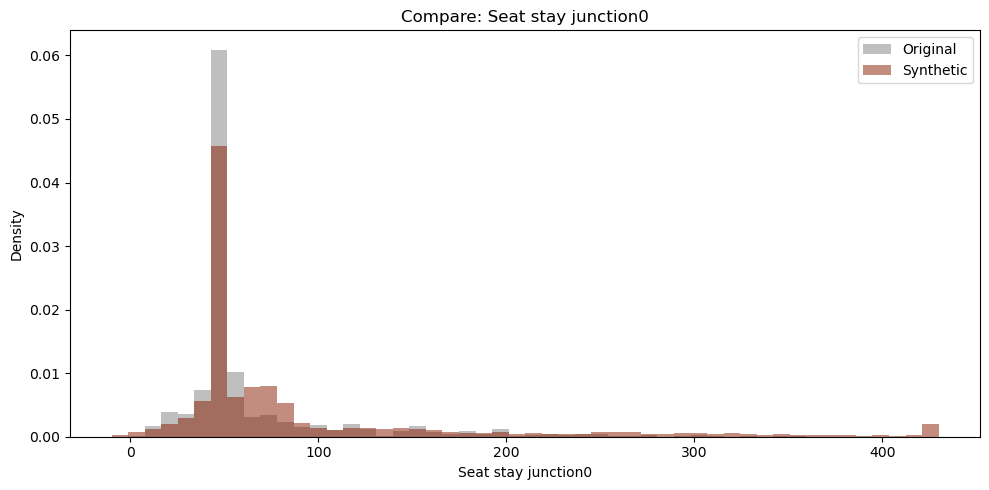

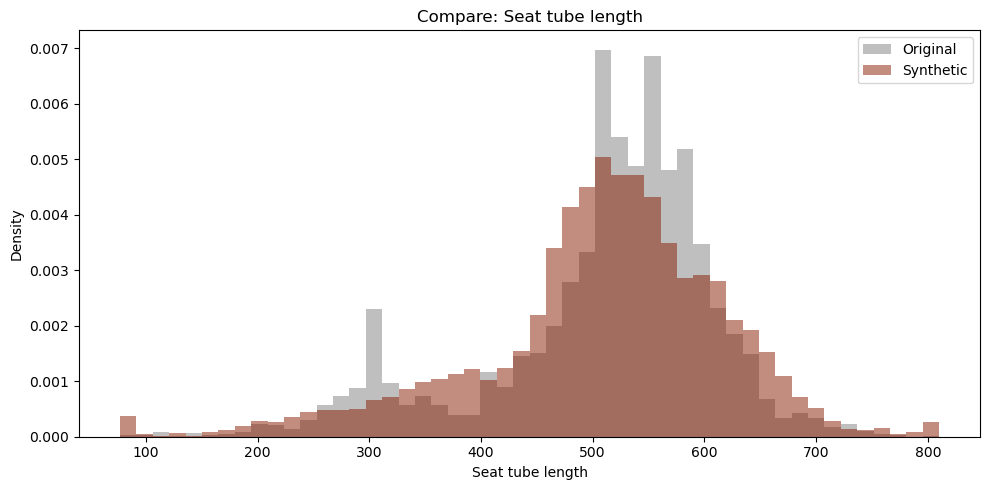

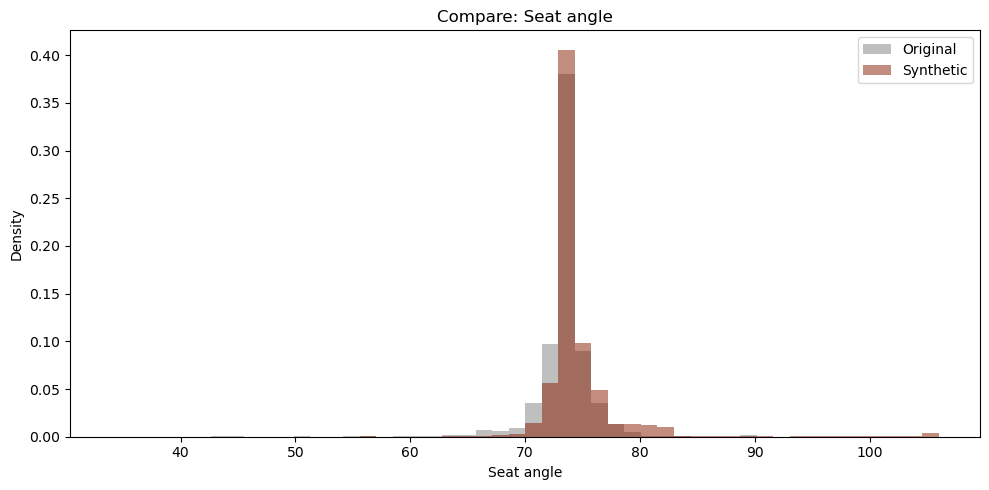

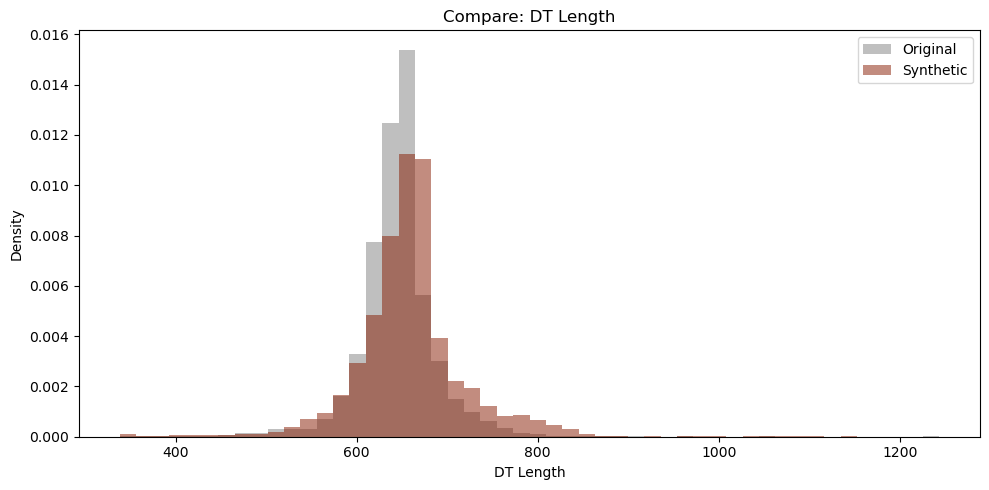

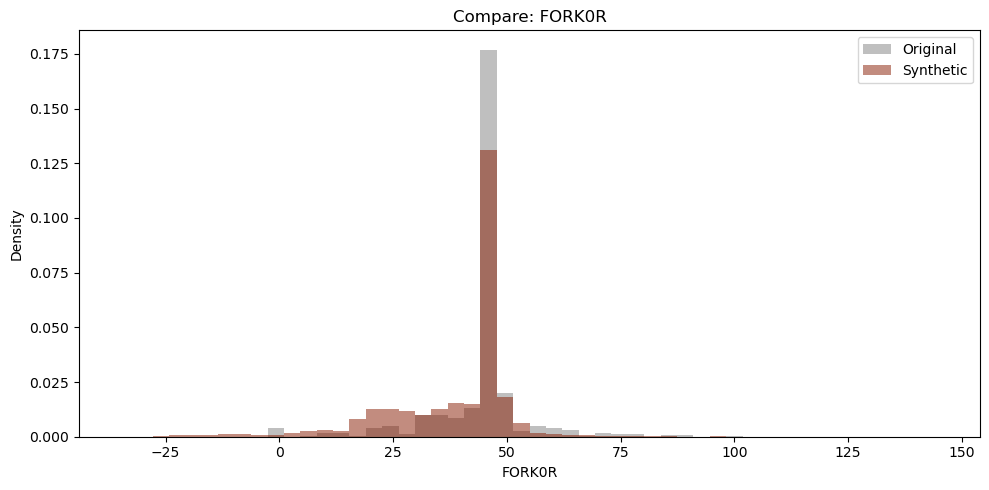

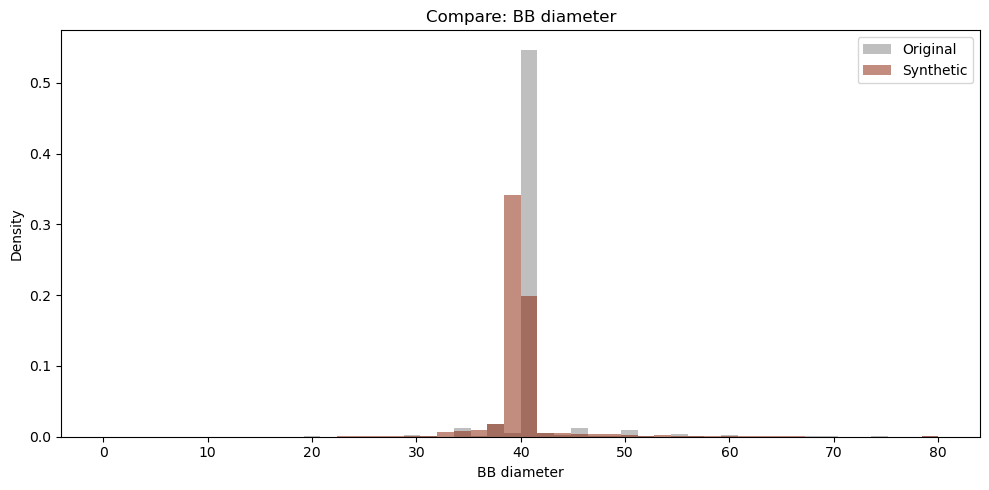

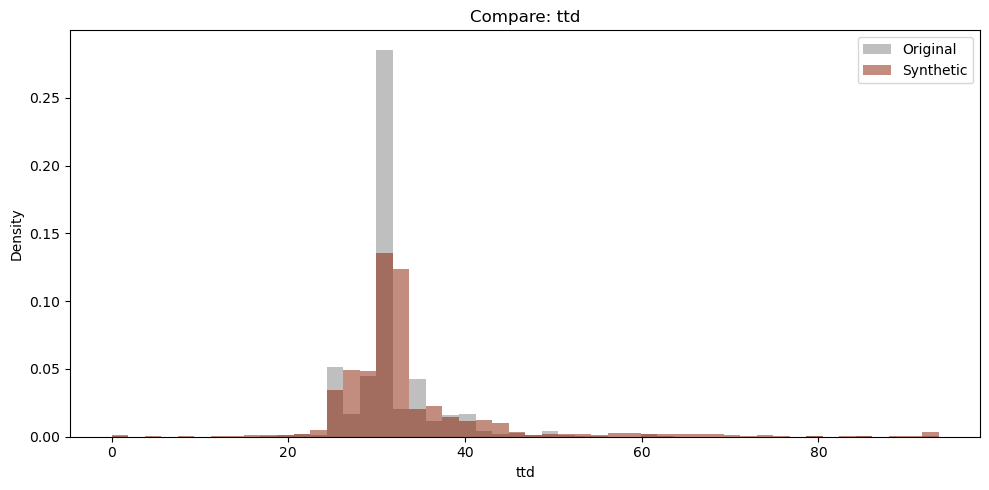

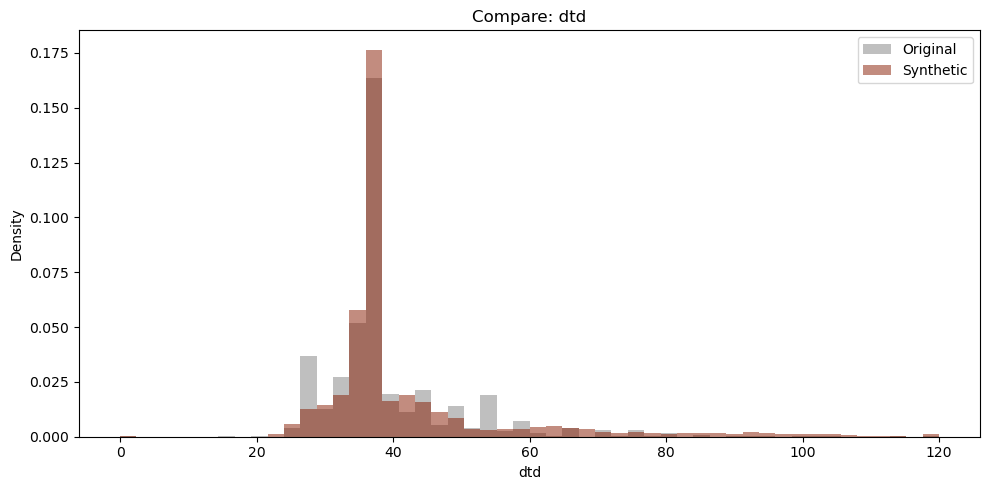

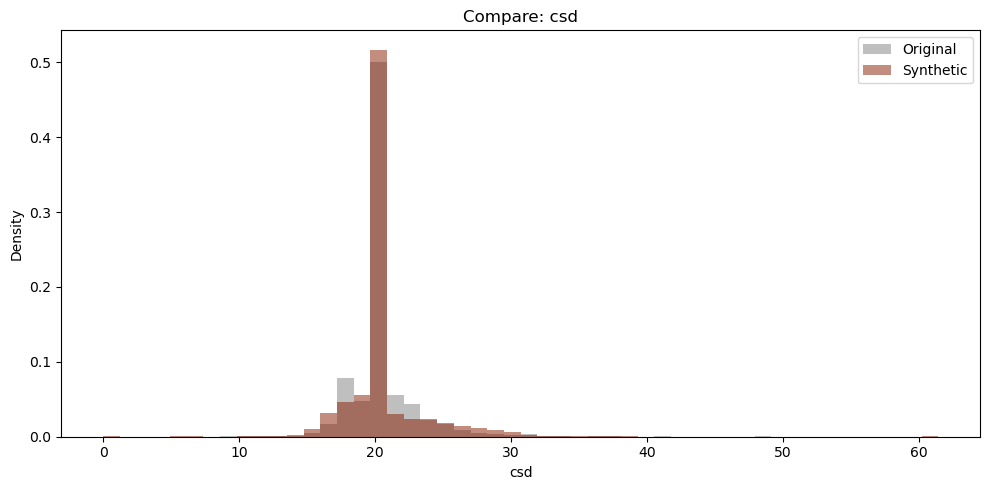

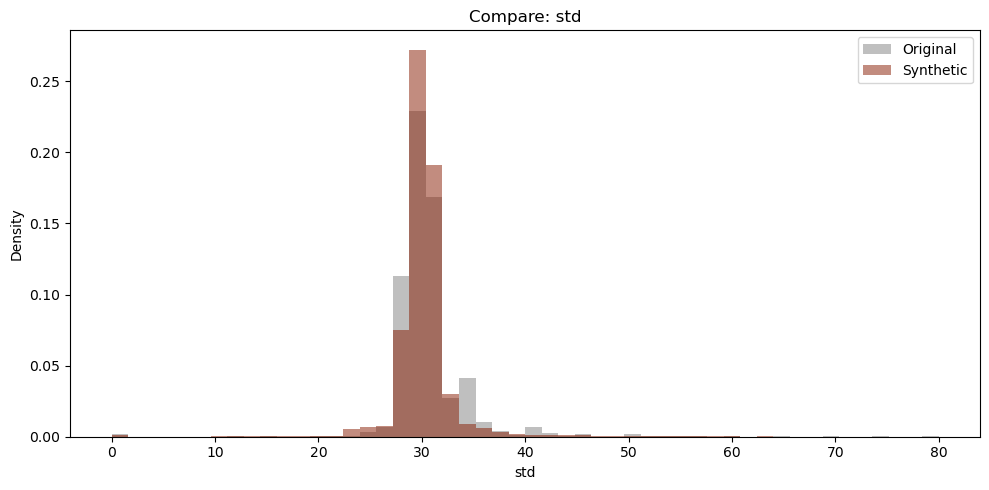

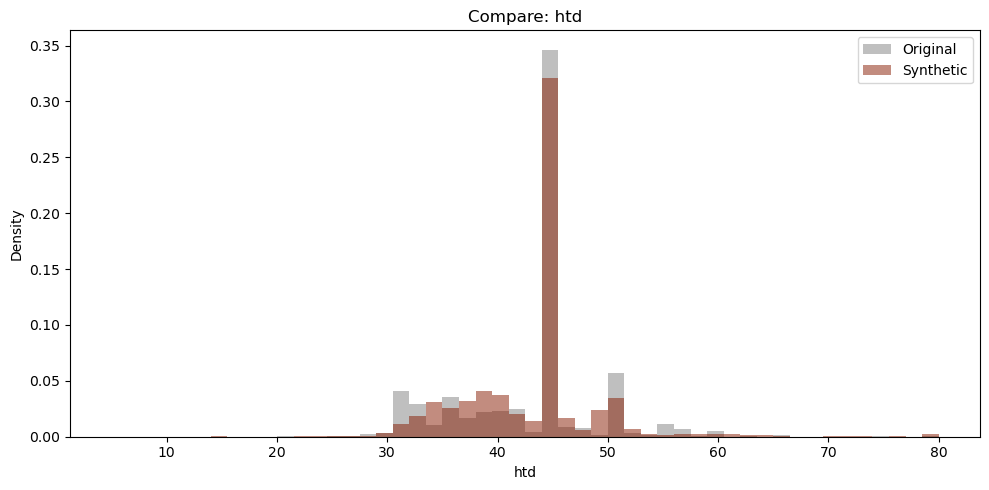

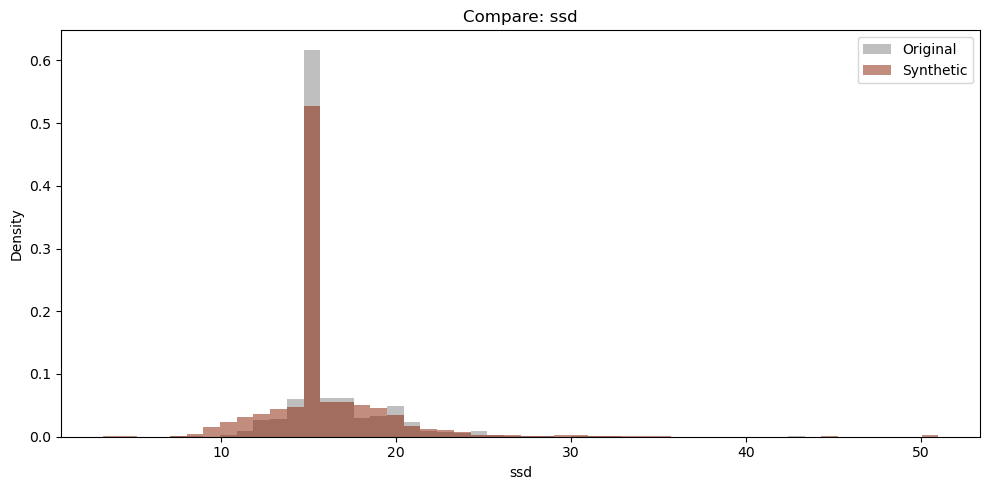

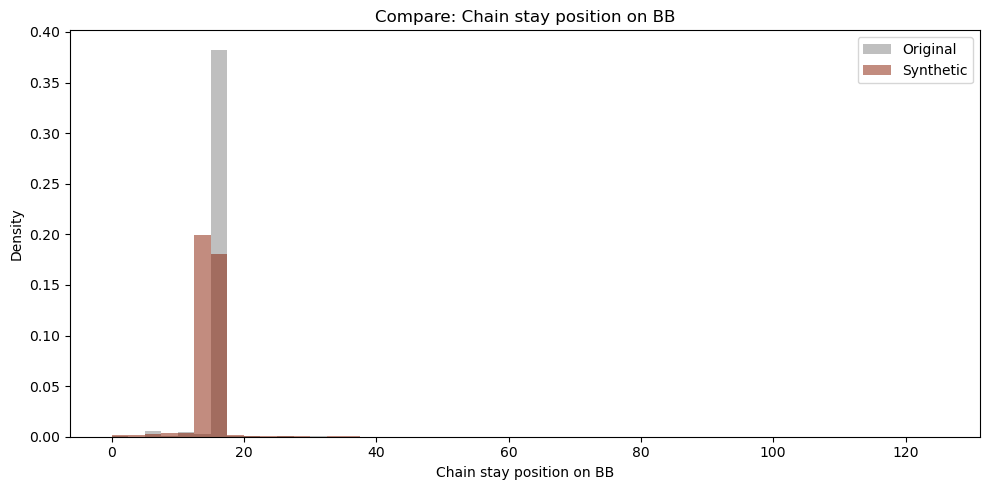

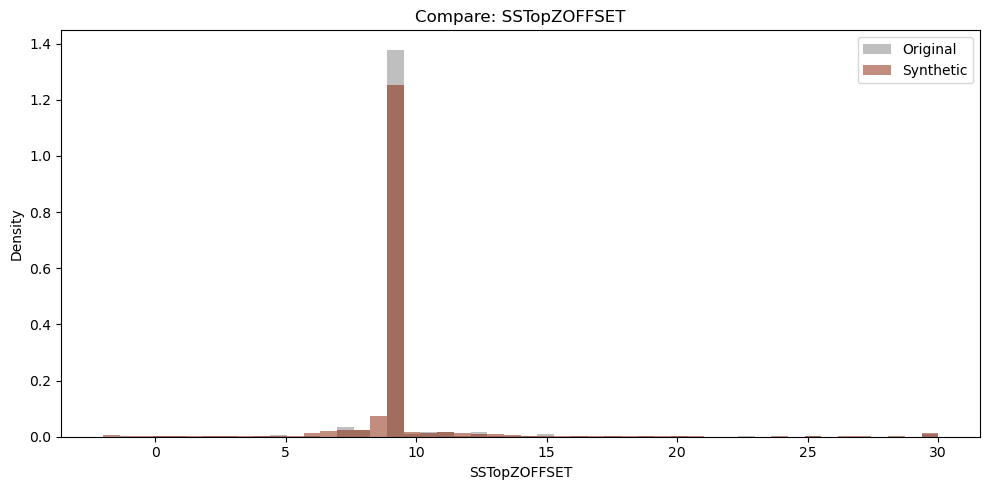

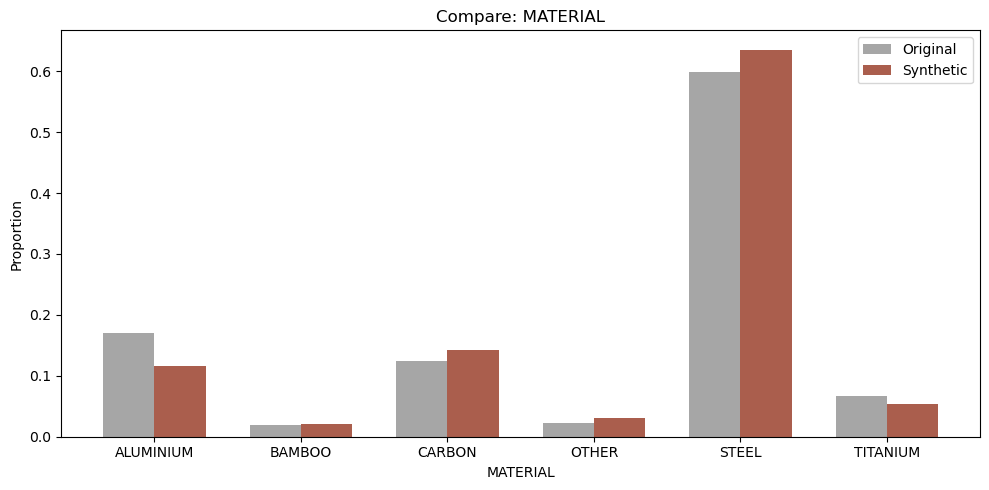

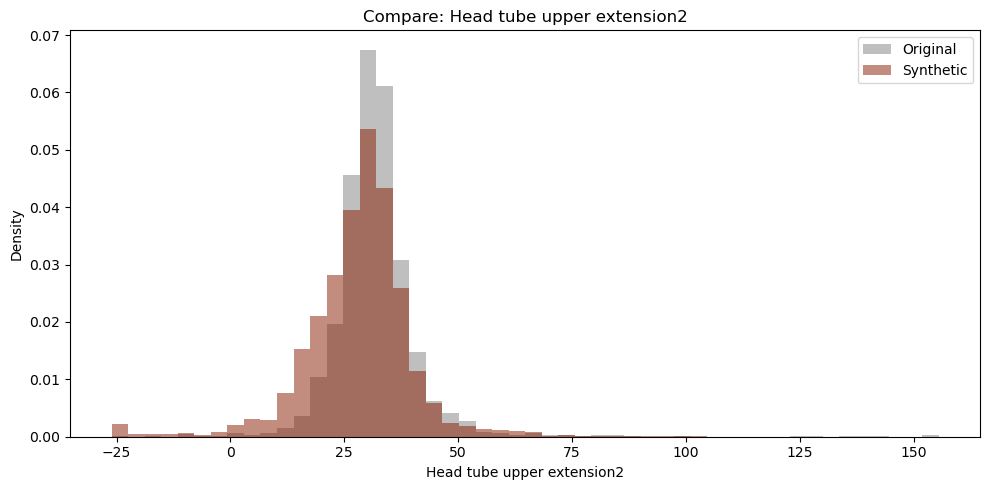

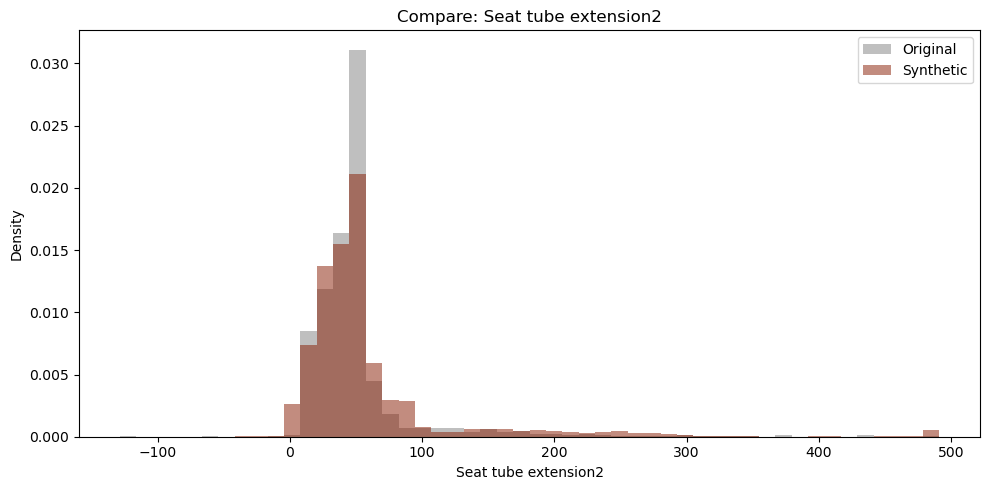

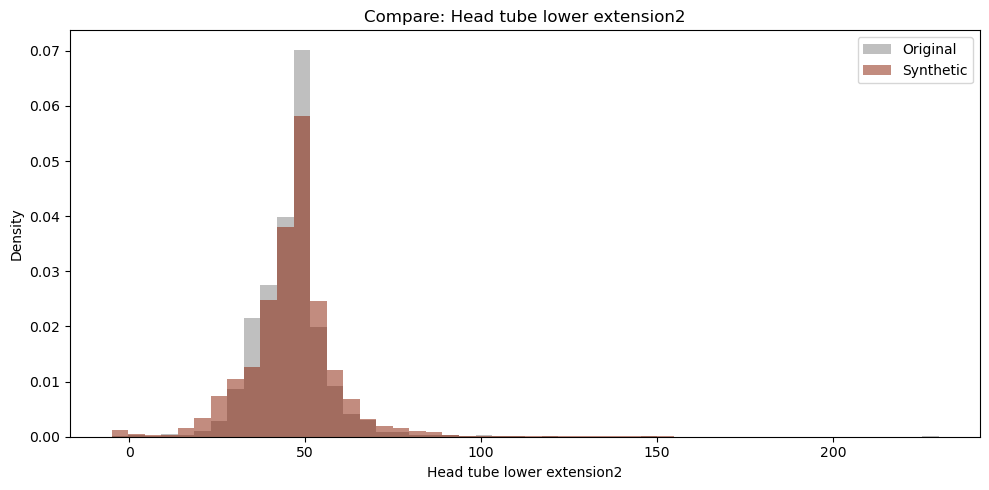

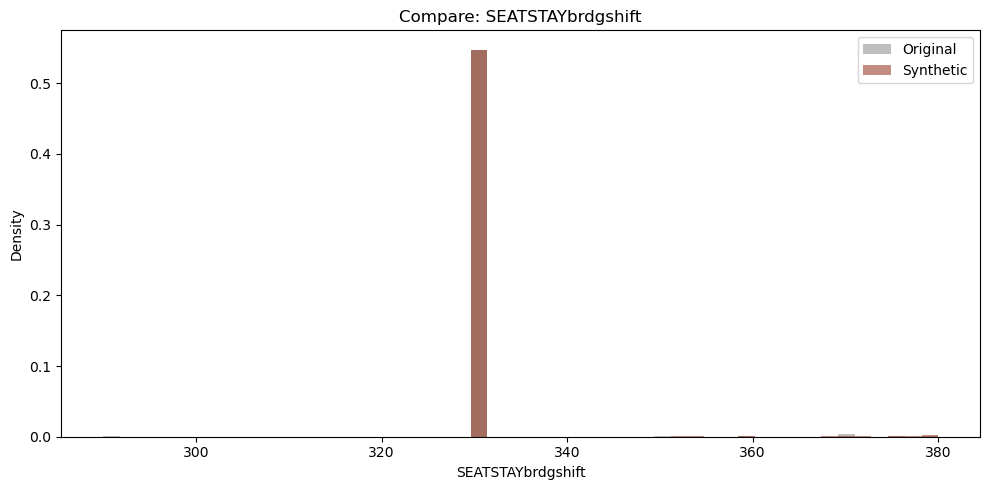

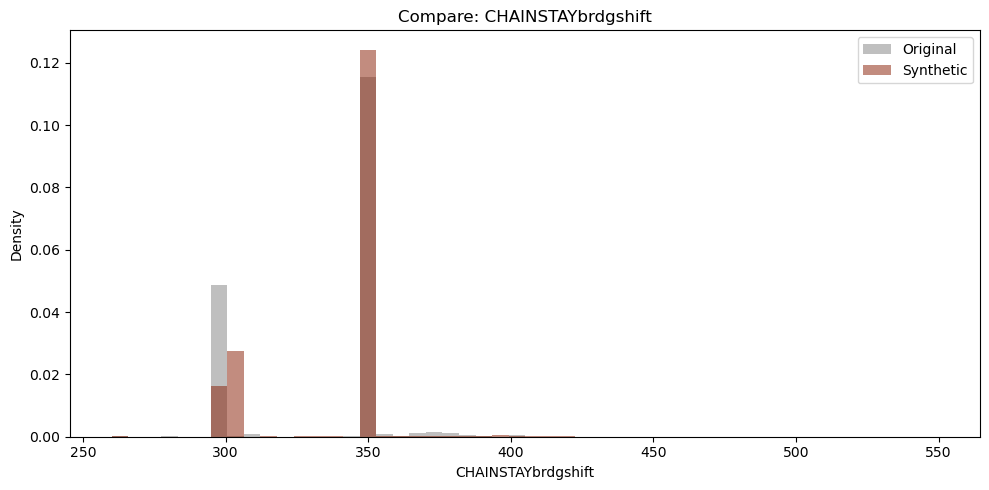

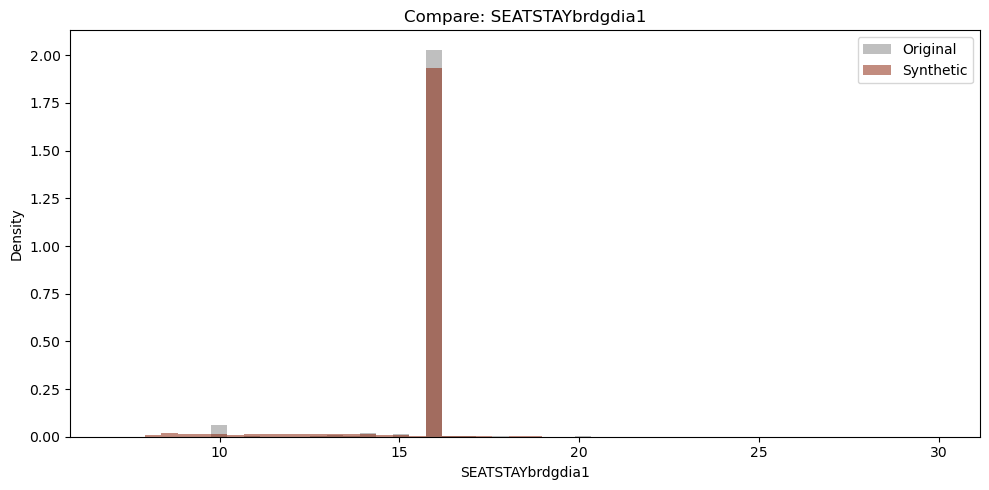

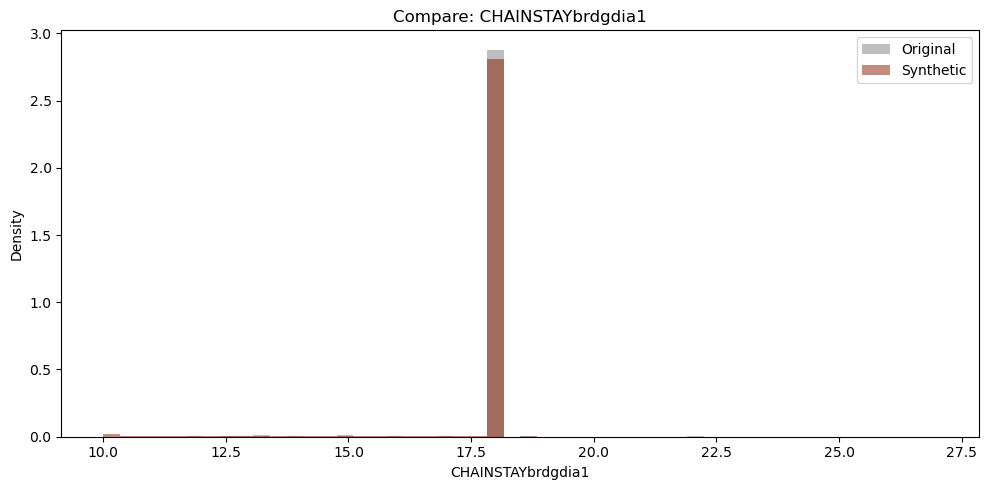

/home/mileva/mambaforge/envs/bike-bench-cuda/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7132: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


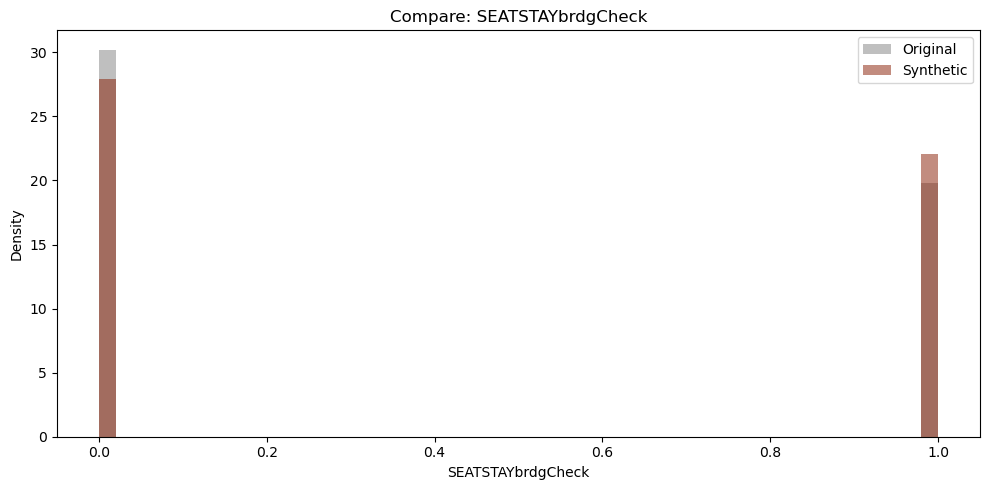

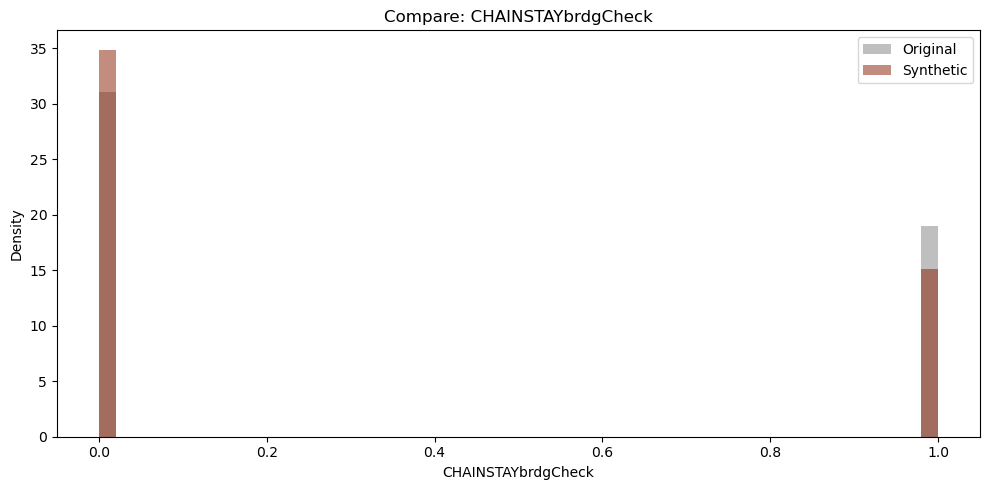

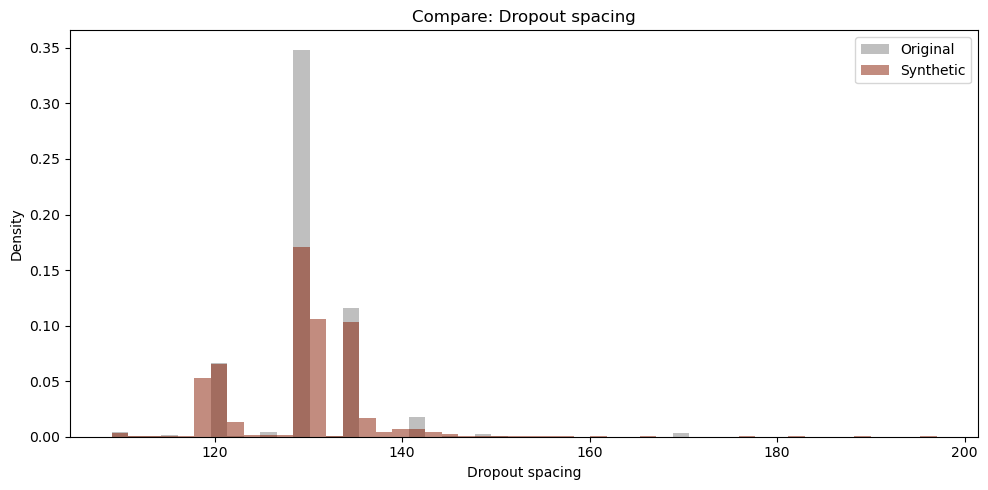

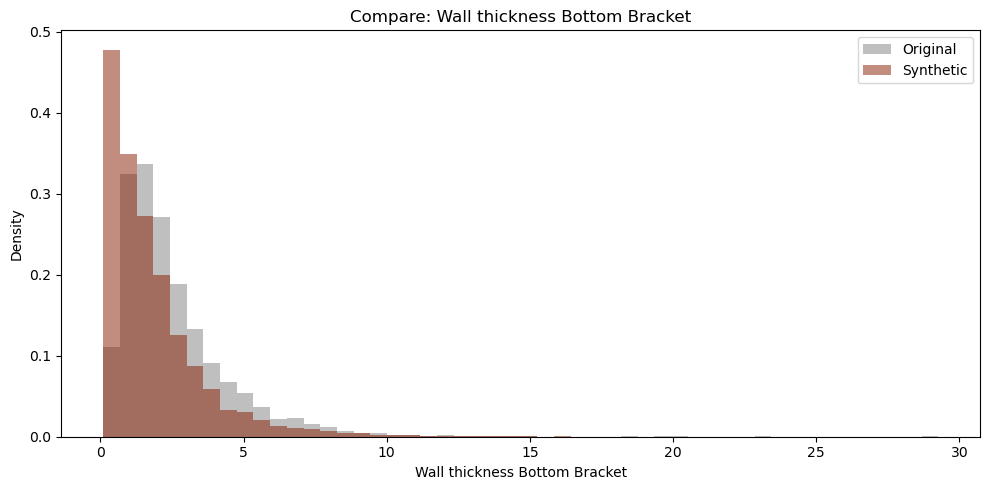

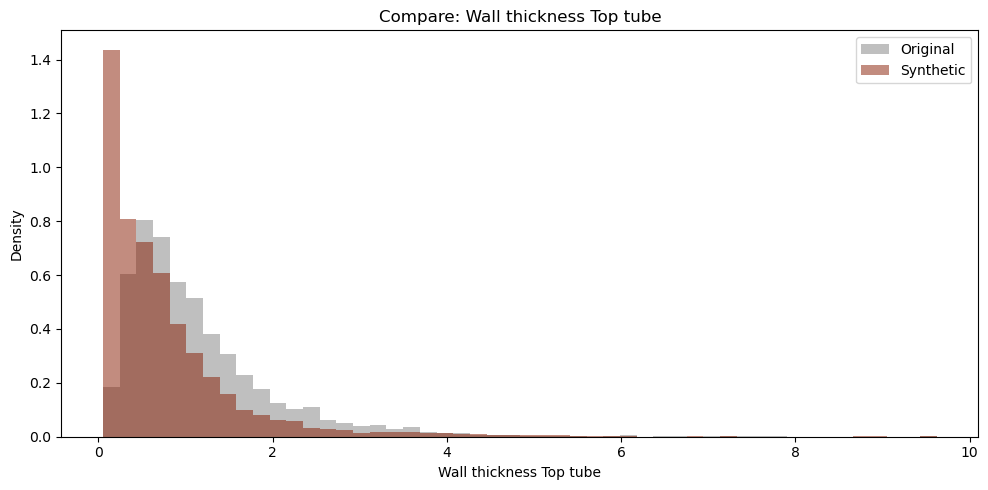

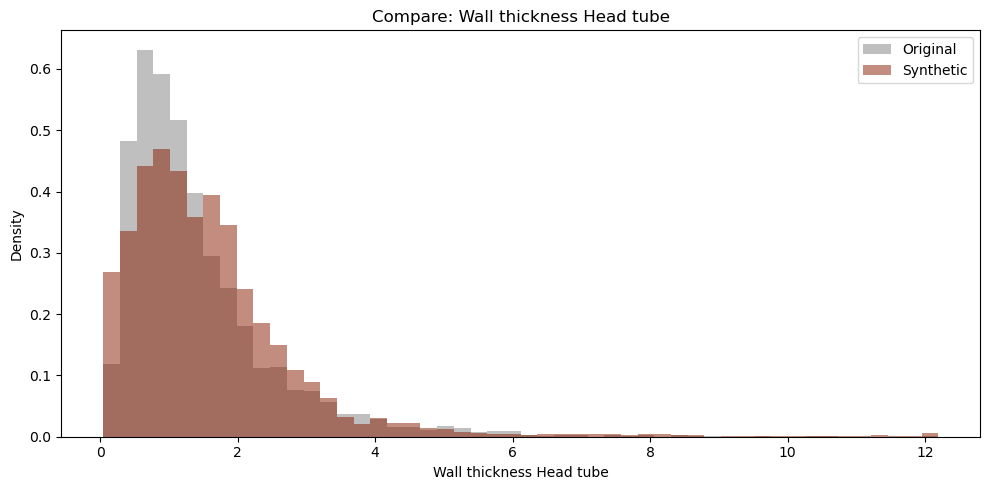

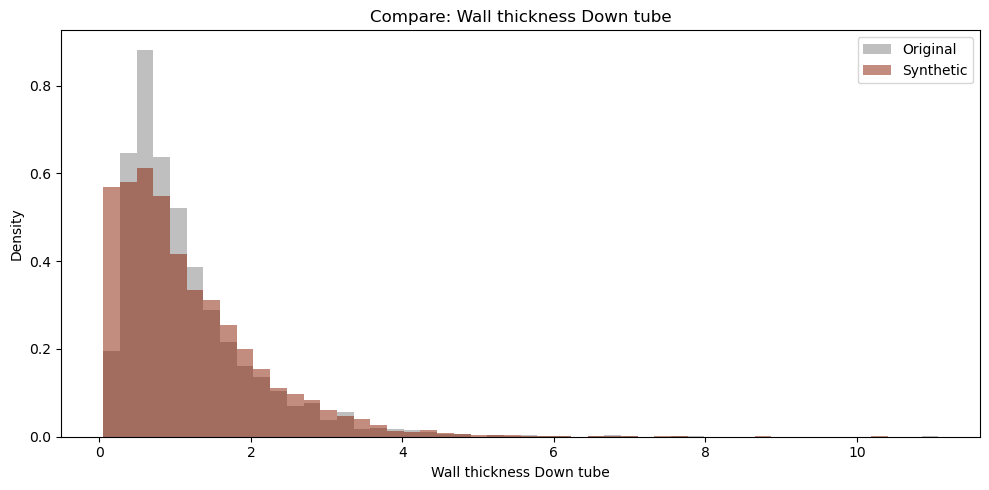

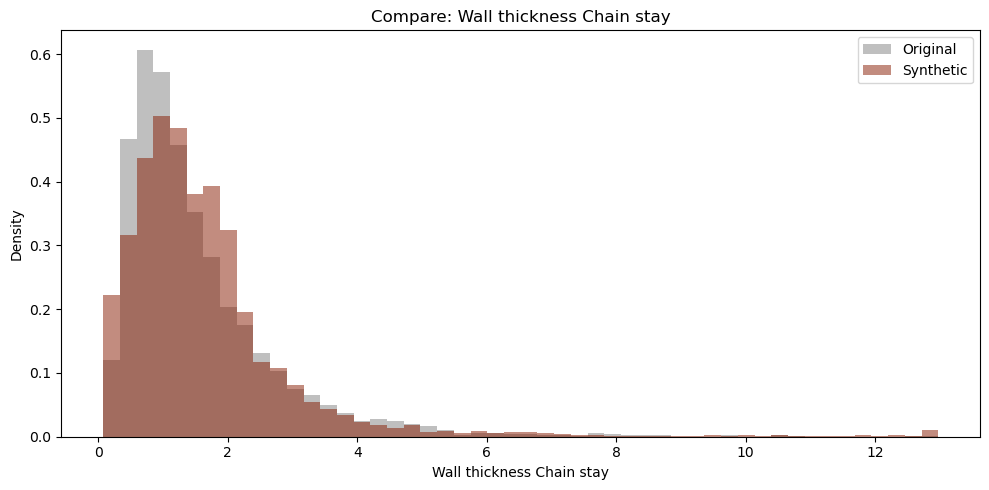

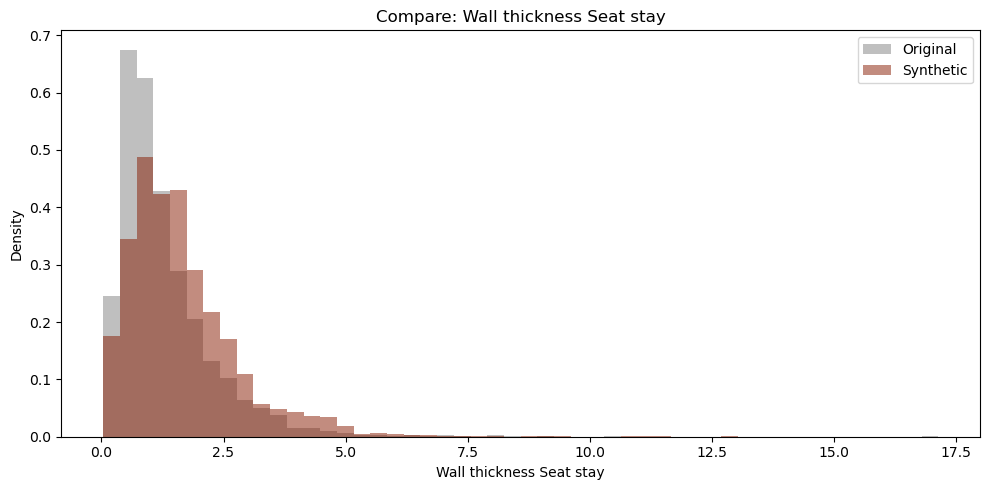

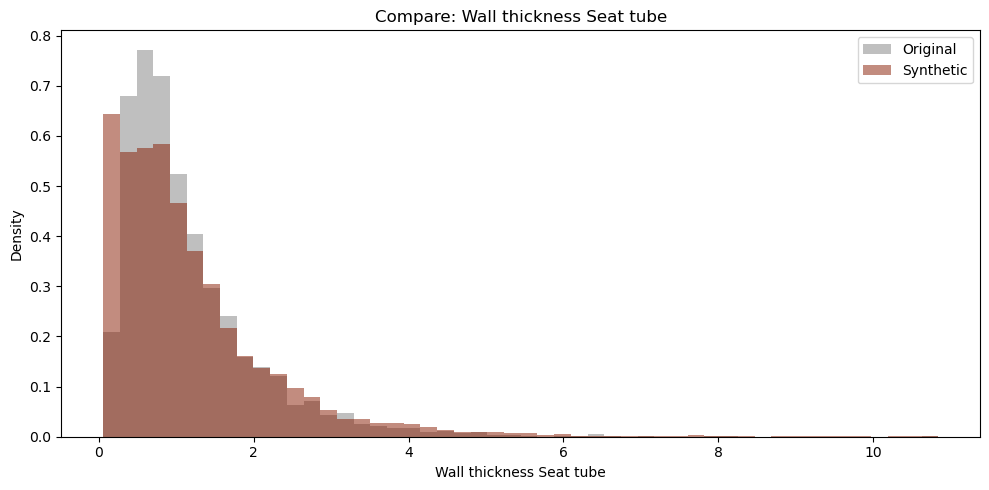

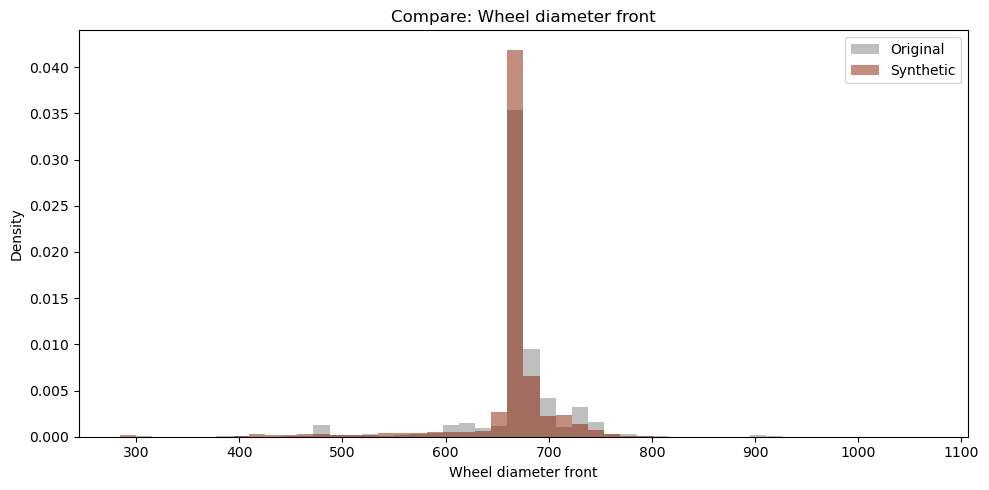

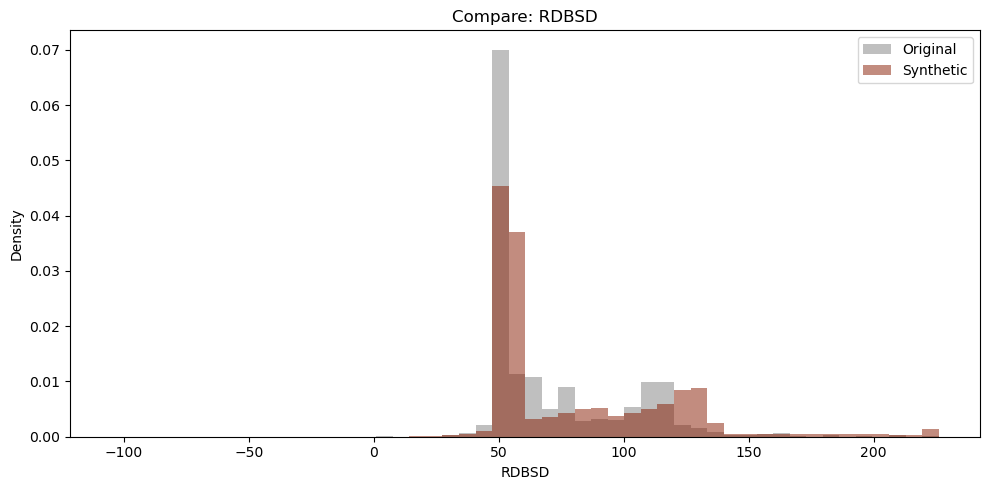

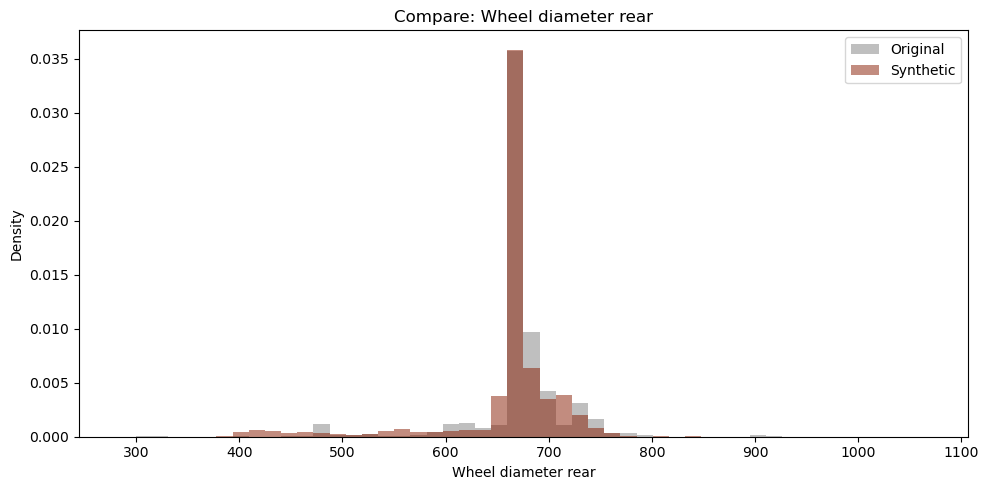

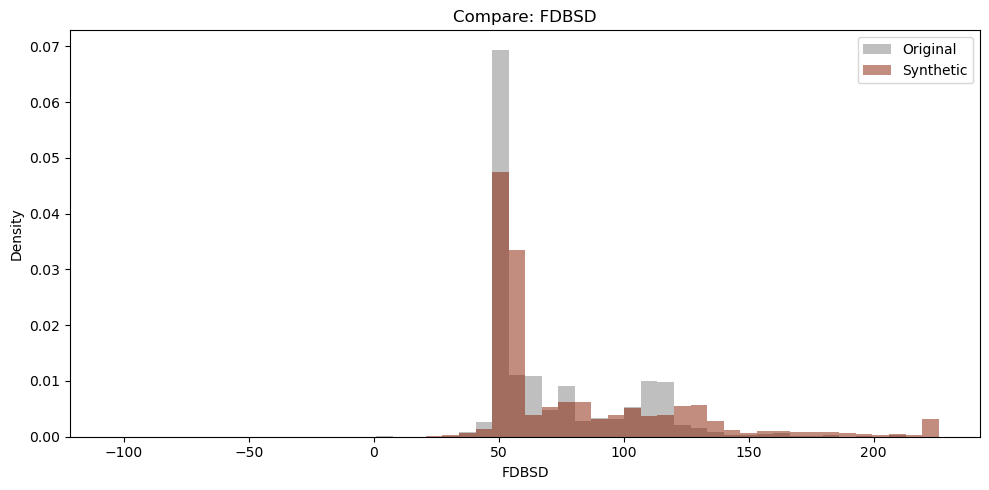

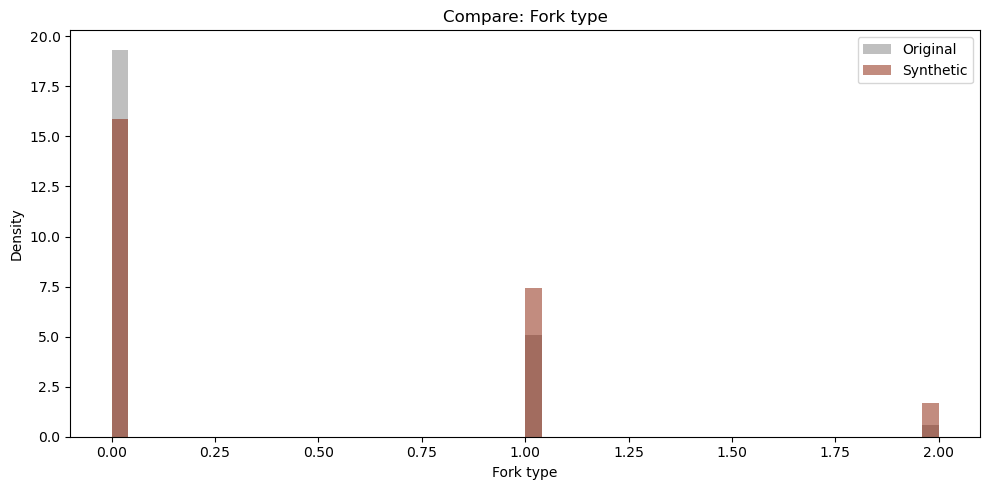

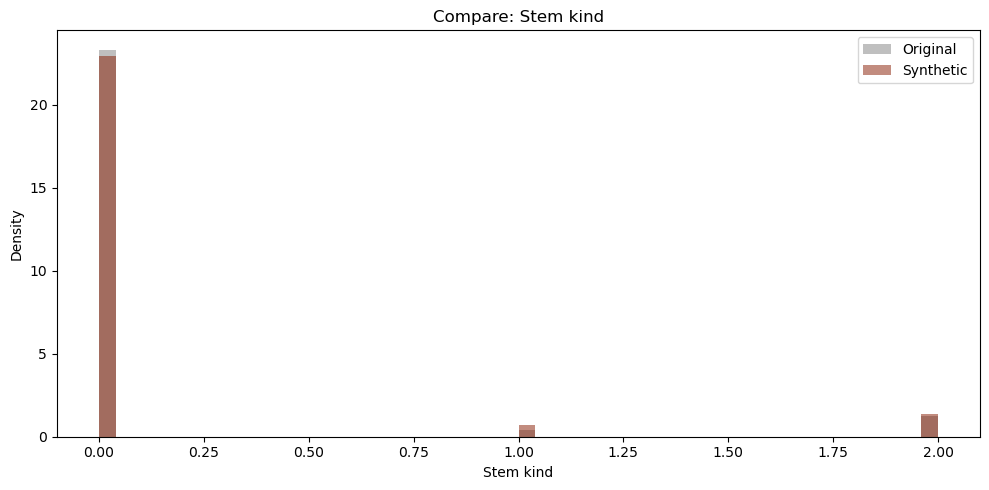

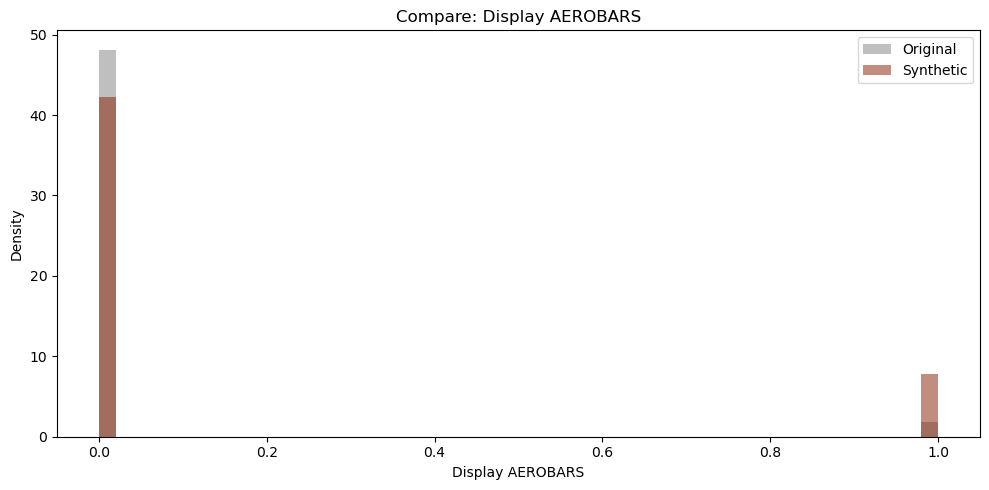

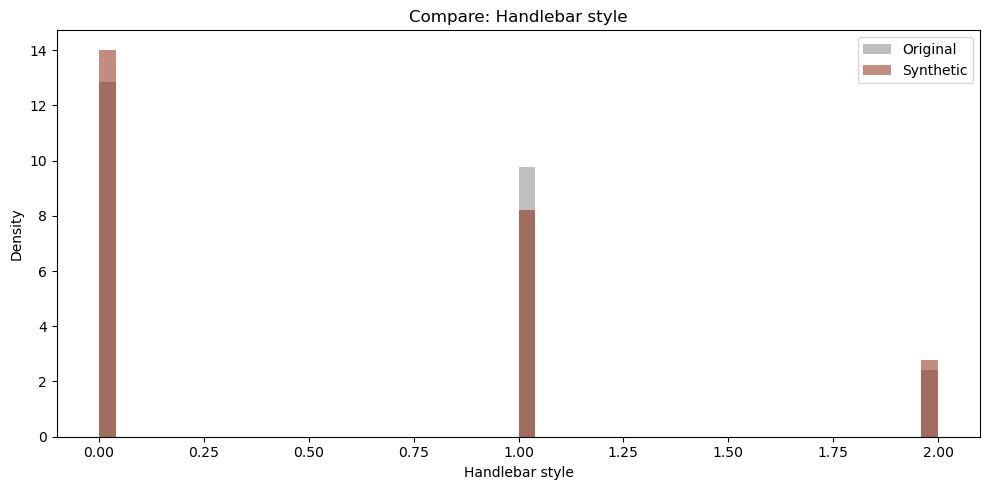

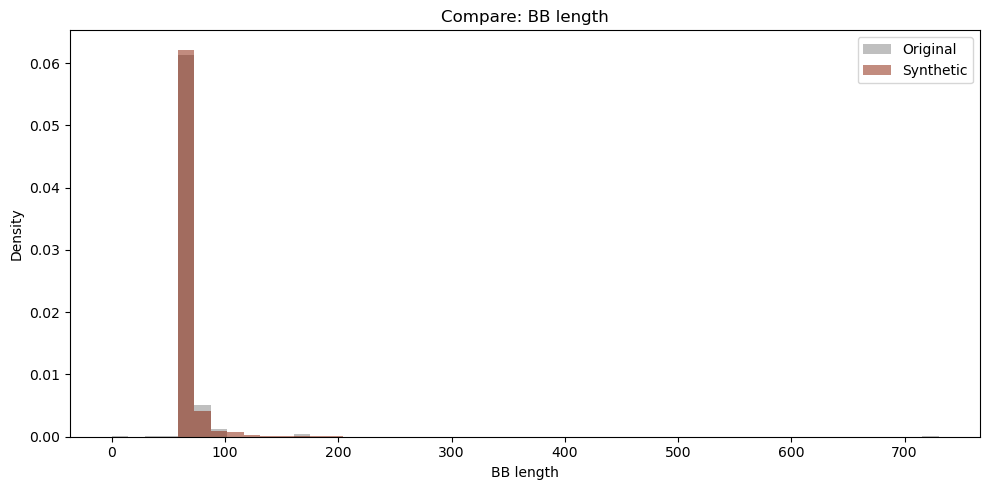

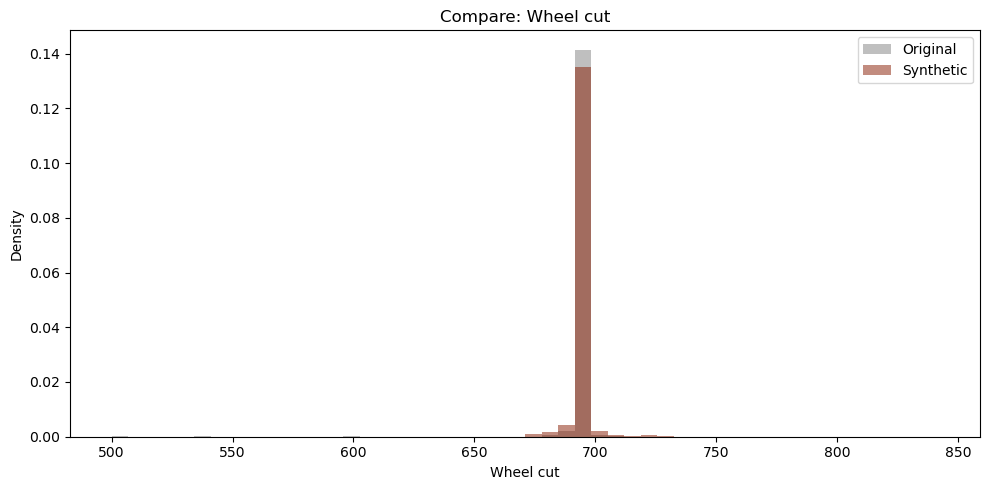

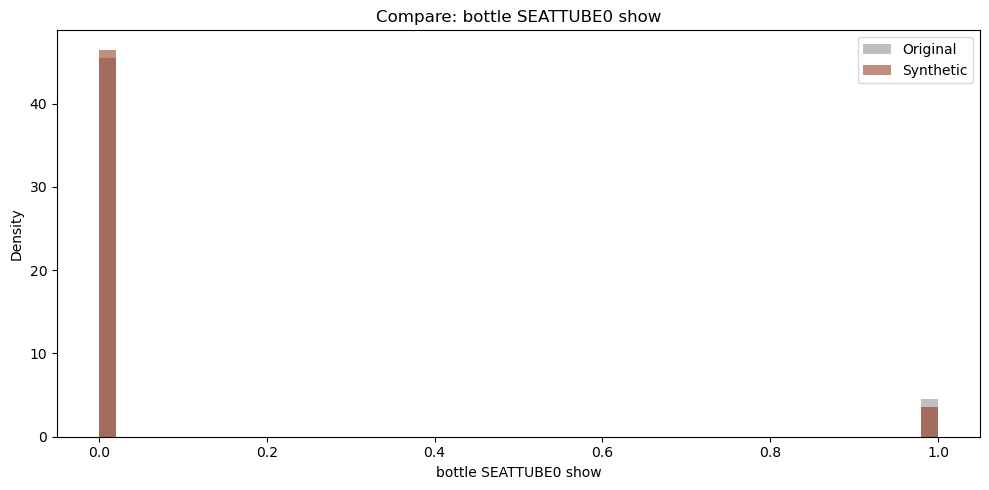

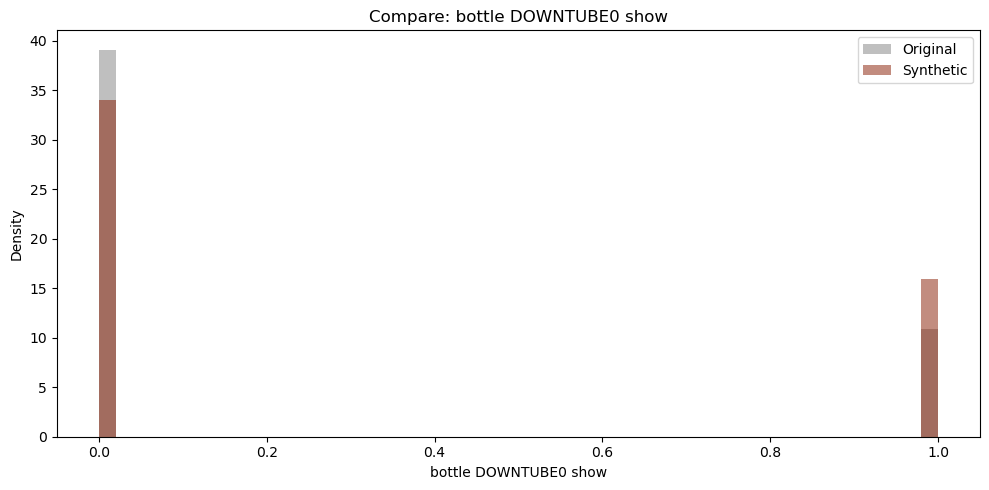

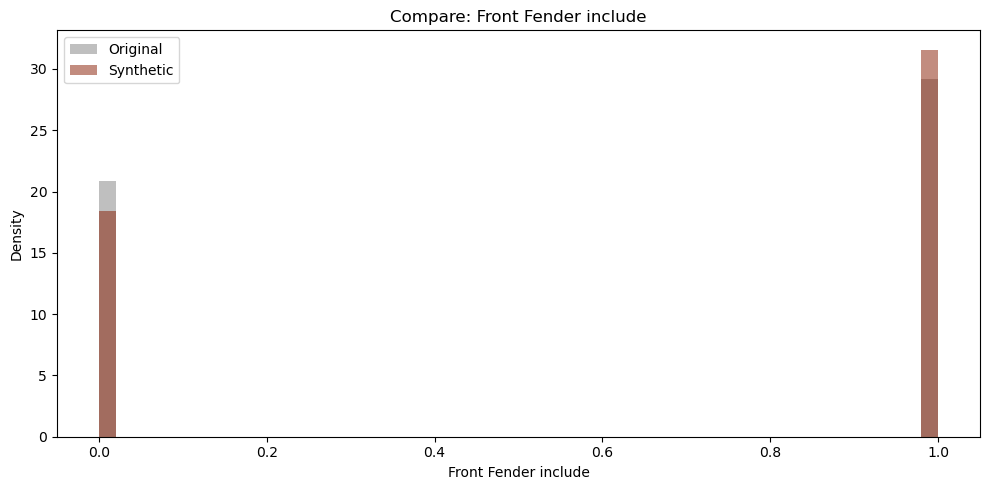

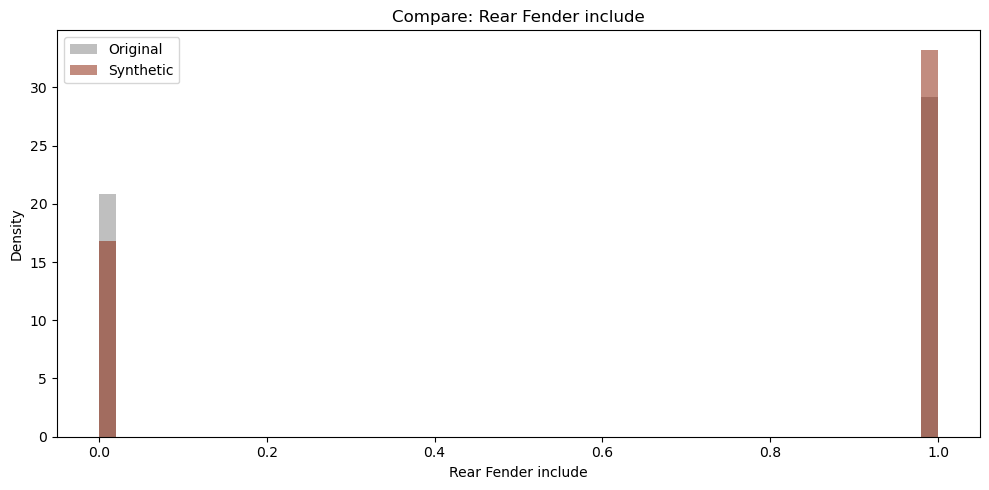

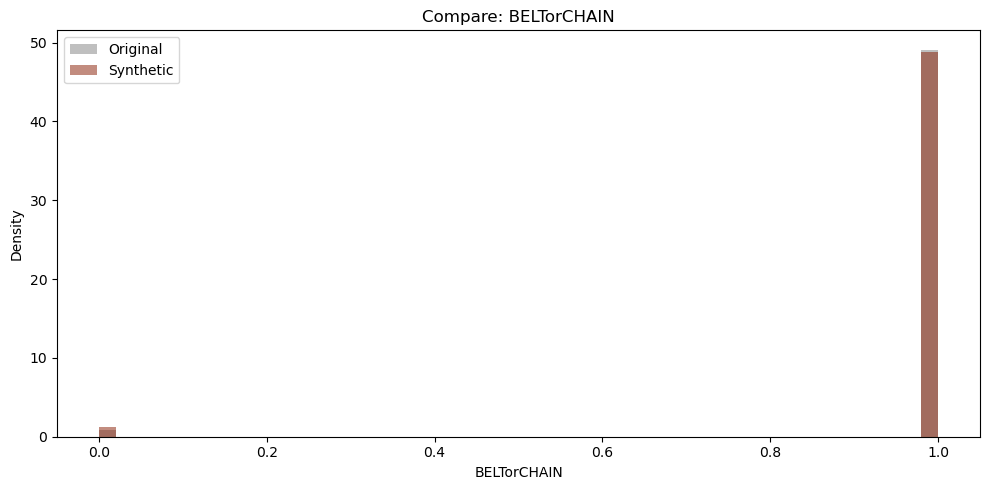

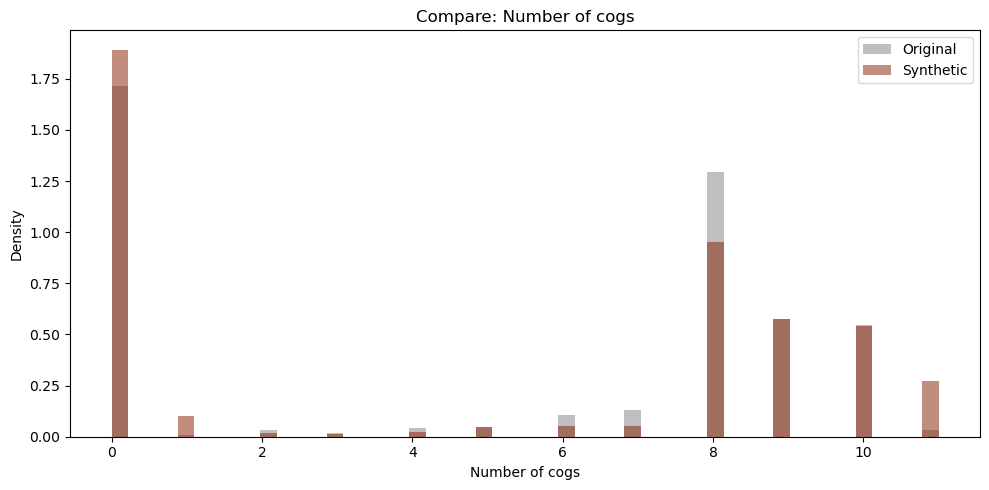

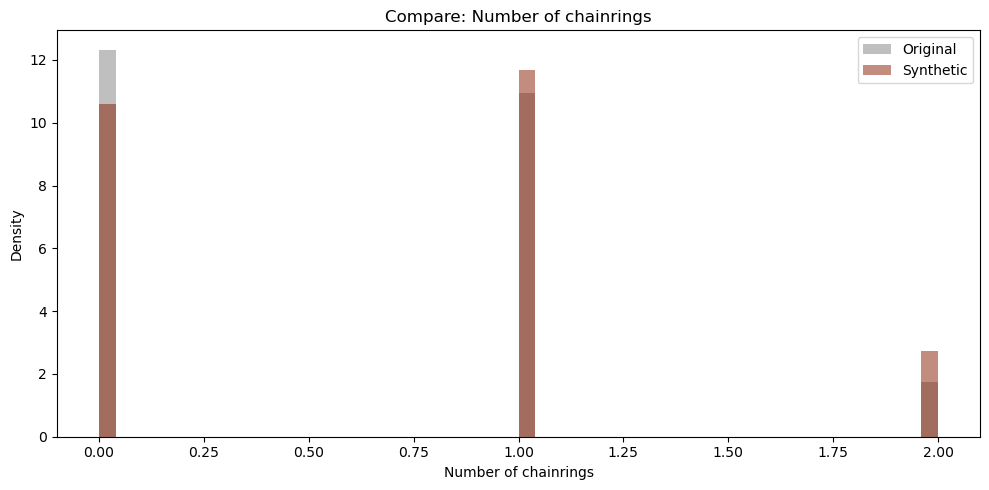

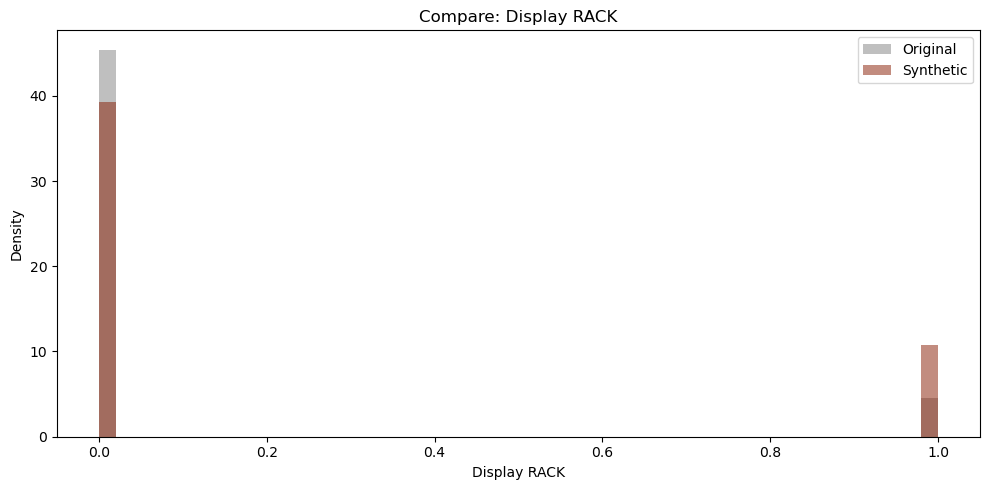

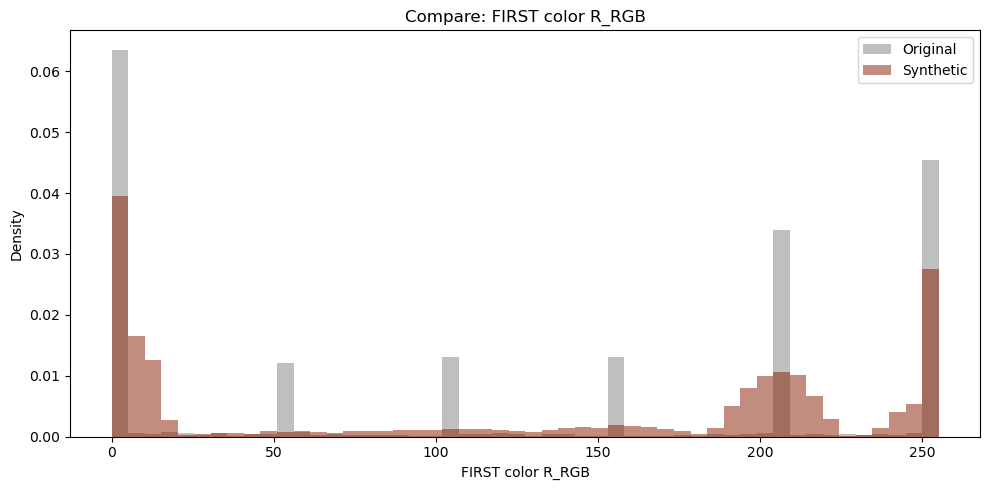

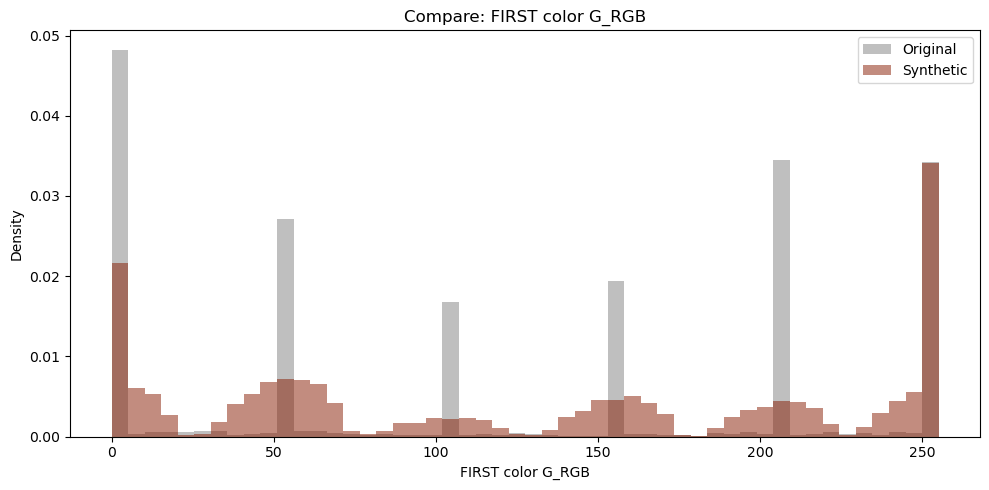

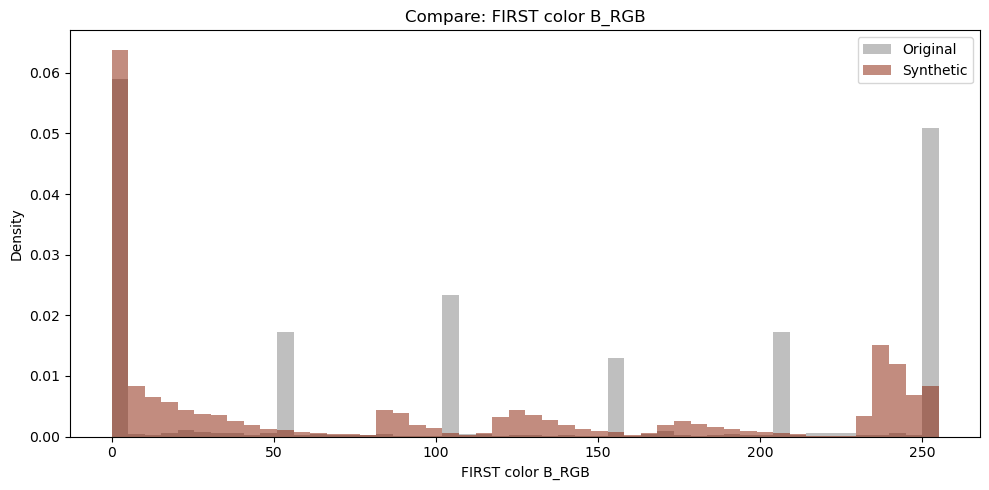

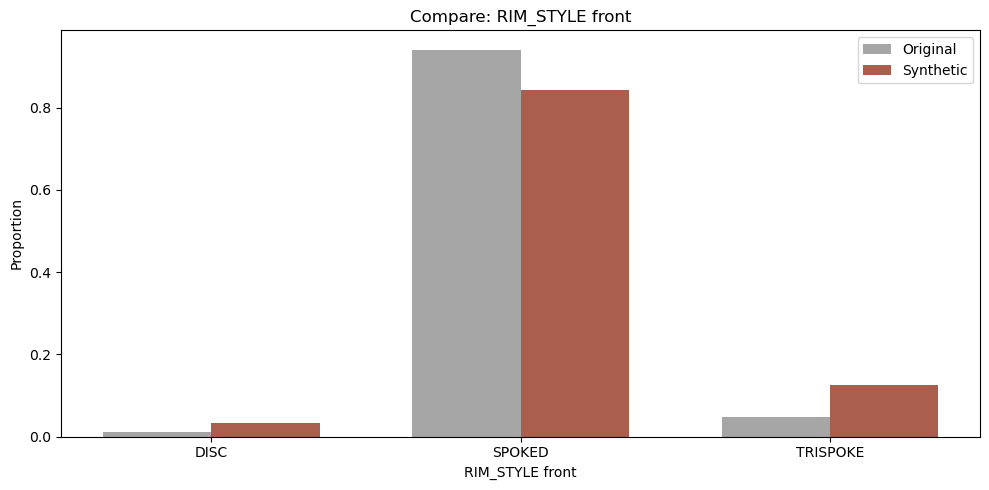

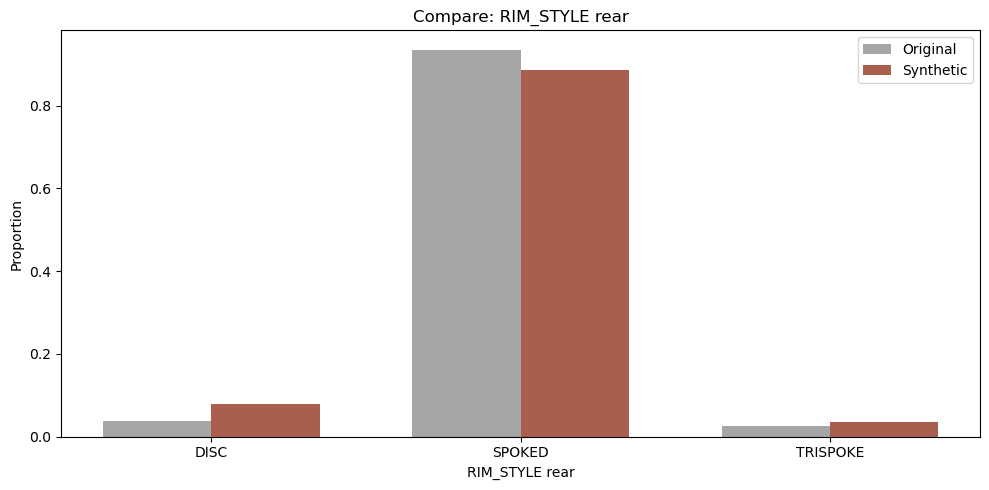

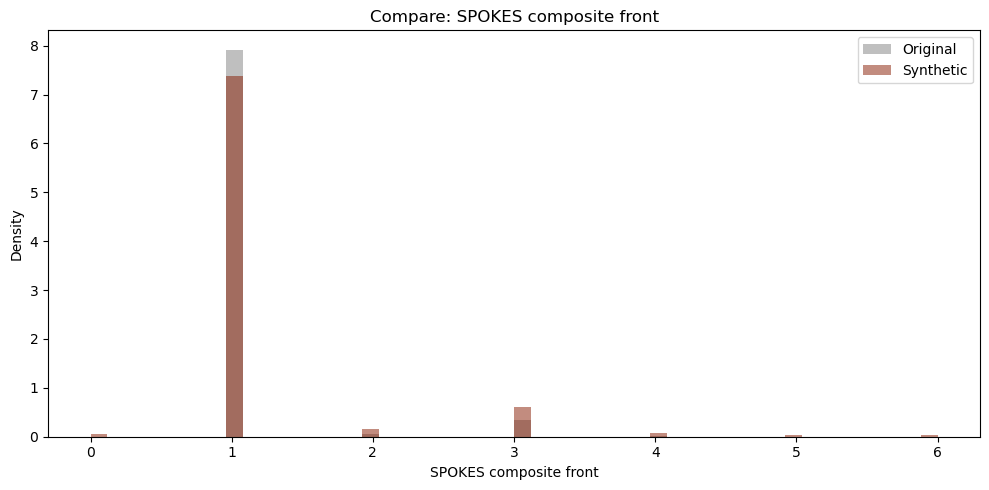

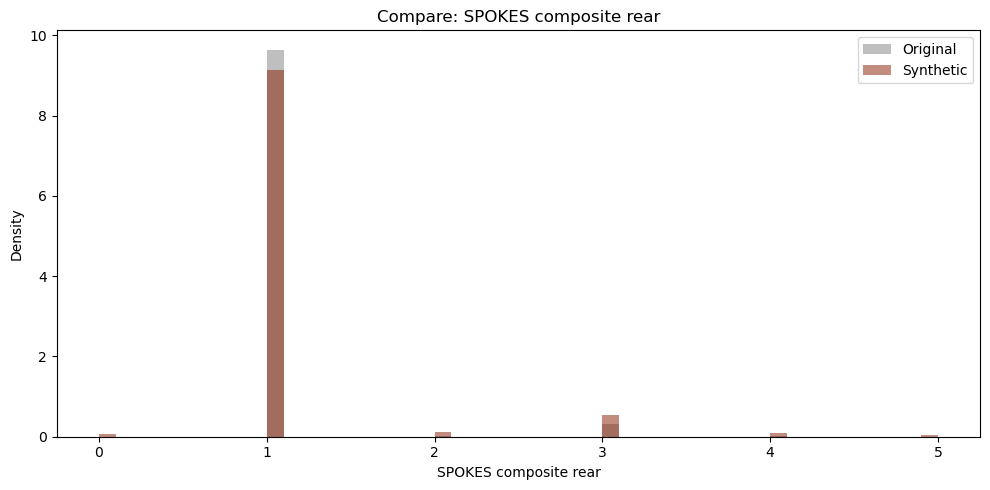

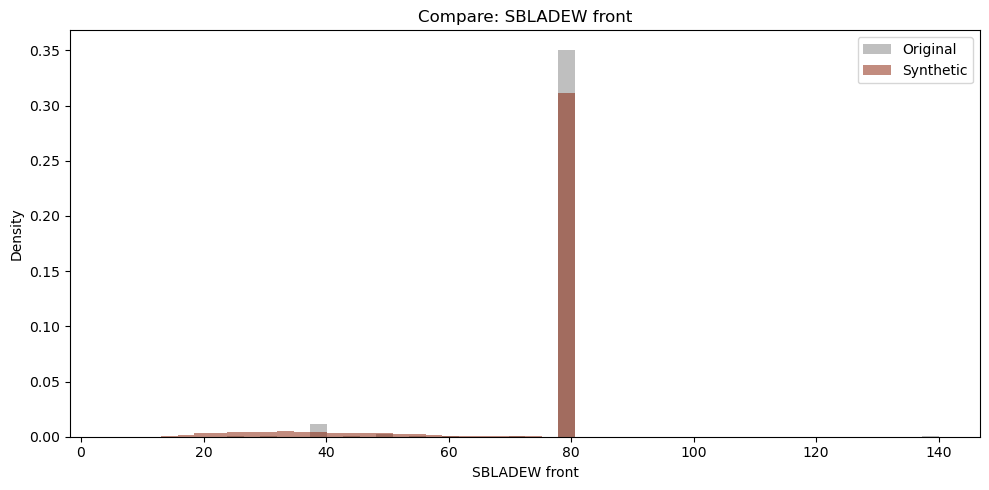

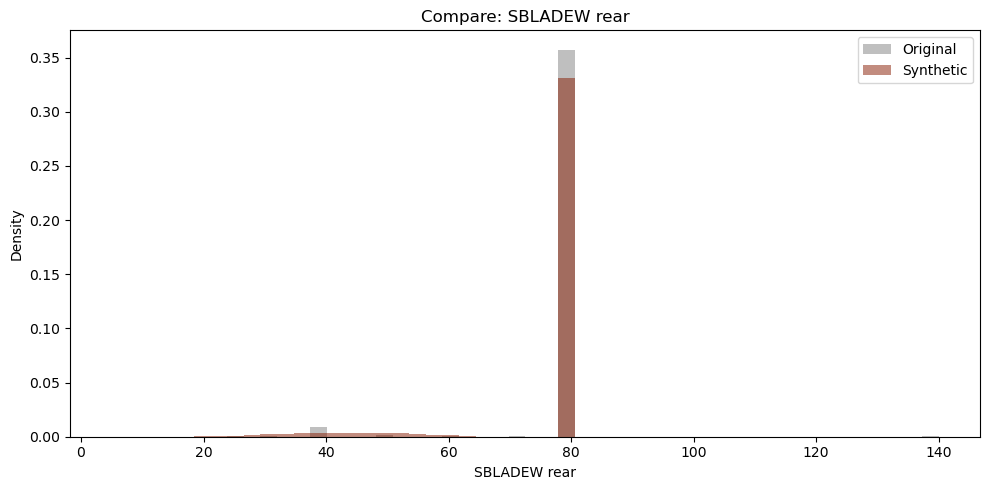

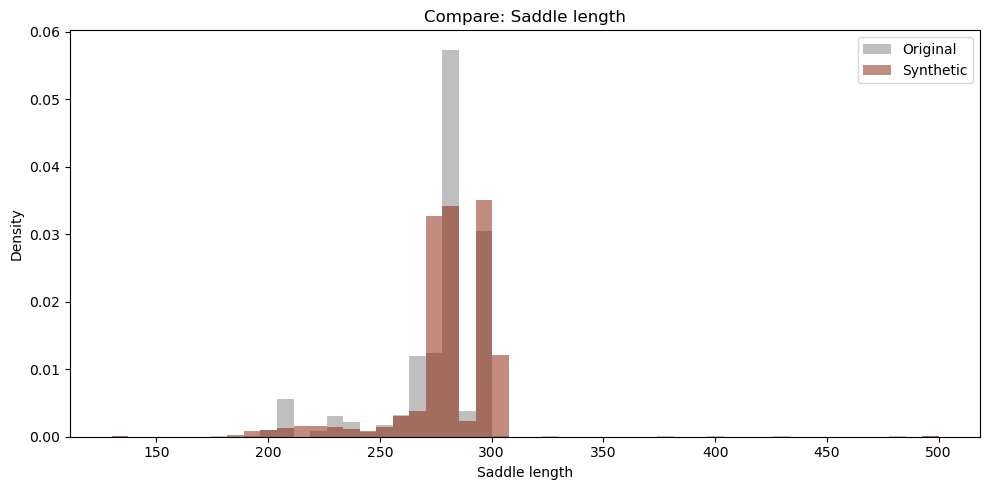

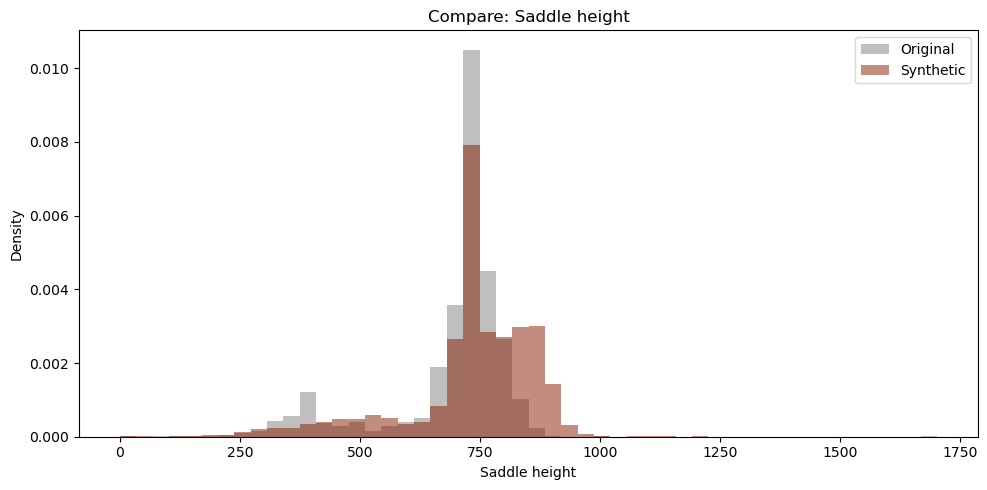

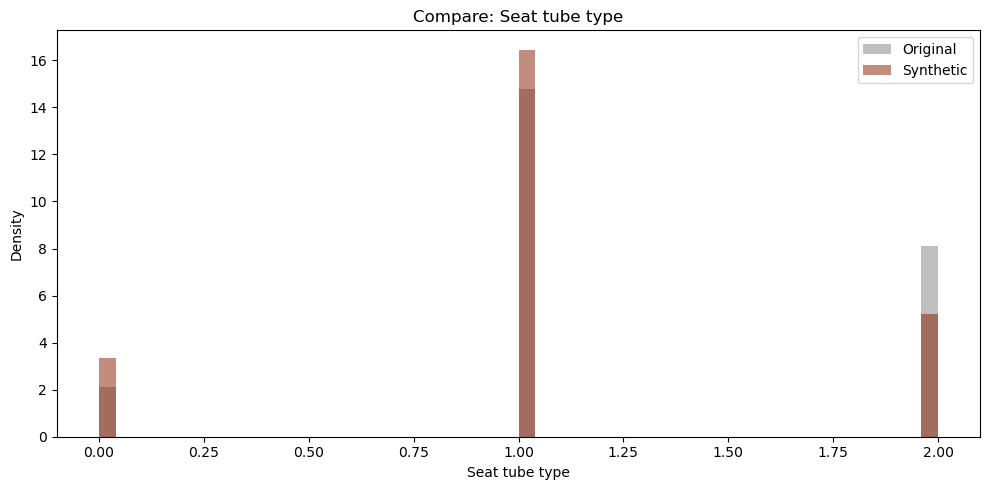

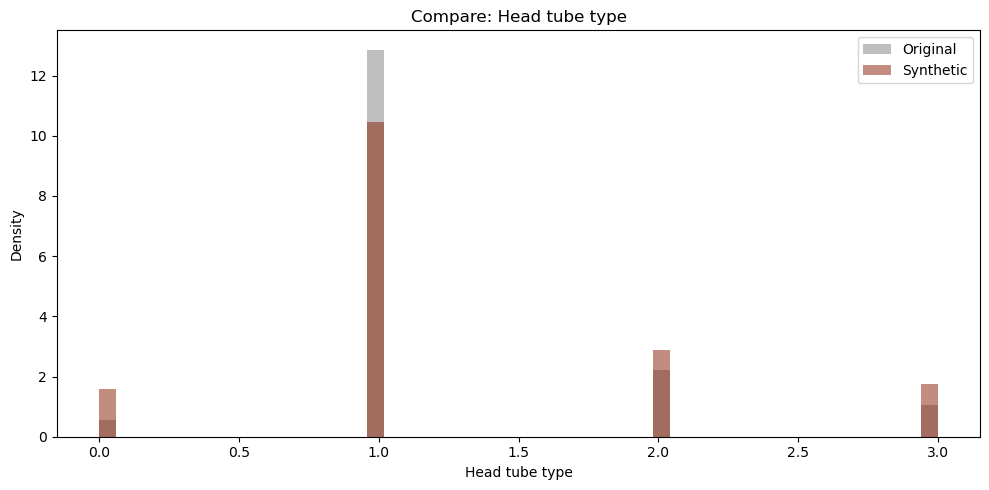

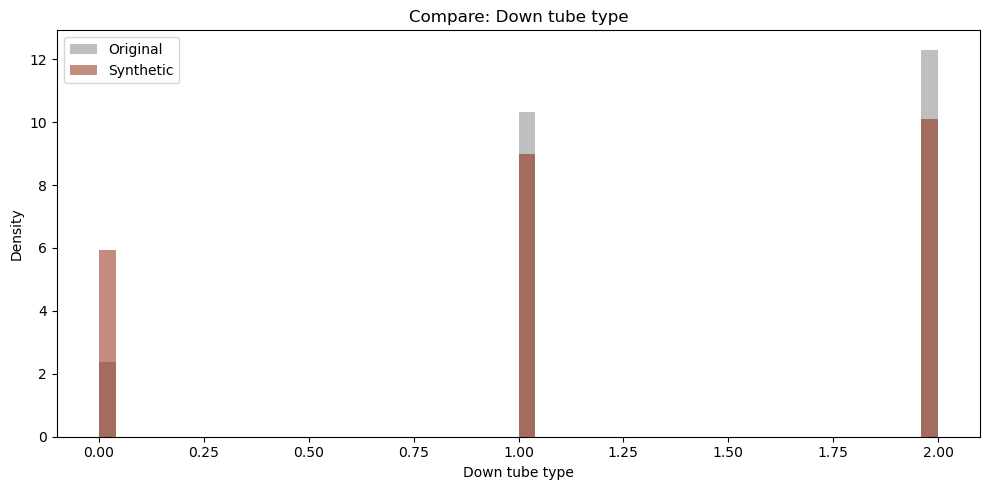

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compare_distributions(
    real_df: pd.DataFrame,
    synth_df: pd.DataFrame,
    numeric_bins: int = 50,
    figsize: tuple = (10, 5)
):
    """
    For each column in real_df / synth_df:
      - Numeric: overlaid, fixed‐width histograms
      - Categorical/boolean: side‐by‐side bar plots with equal bar width
    """
    orig_color = 'gray'
    synth_color = '#871a01'
    for col in real_df.columns:
        plt.figure(figsize=figsize)
        real = real_df[col]
        synth = synth_df[col]

        # --- Numeric / ordinal columns ---
        if pd.api.types.is_numeric_dtype(real):
            # convert to numpy arrays
            r = real.dropna().to_numpy()
            s = synth.dropna().to_numpy()

            # common min/max & bins
            lo, hi = np.min([r.min(), s.min()]), np.max([r.max(), s.max()])
            bins = np.linspace(lo, hi, numeric_bins + 1)

            plt.hist(r, bins=bins, density=True, alpha=0.5, label='Original', color = orig_color)
            plt.hist(s, bins=bins, density=True, alpha=0.5, label='Synthetic', color = synth_color)
            plt.xlabel(col)
            plt.ylabel('Density')

        # --- Categorical or boolean columns ---
        else:
            # get normalized counts
            real_counts  = real.value_counts(normalize=True)
            synth_counts = synth.value_counts(normalize=True)

            # union of all categories / levels
            levels = sorted(set(real_counts.index) | set(synth_counts.index))

            # proportions in that order
            real_props  = [real_counts .get(l, 0) for l in levels]
            synth_props = [synth_counts.get(l, 0) for l in levels]

            # integer x positions & fixed bar width
            x = np.arange(len(levels))
            width = 0.35

            plt.bar(x - width/2, real_props,  width, label='Original', color=orig_color, alpha=0.7)
            plt.bar(x + width/2, synth_props, width, label='Synthetic', color=synth_color, alpha=0.7)

            # label ticks with the actual level names
            plt.xticks(x, [str(l) for l in levels])
            plt.xlabel(col)
            plt.ylabel('Proportion')

        plt.title(f'Compare: {col}')
        plt.legend()
        plt.tight_layout()
        plt.show()

compare_distributions(data, synthetic_collapsed, numeric_bins=50, figsize=(10, 5))

In [ ]:
from bikebench.transformation.one_hot_encoding import encode_to_continuous
samples_oh = encode_to_continuous(synthetic_collapsed)

In [ ]:
from bikebench.rendering import rendering
renderer = rendering.RenderingEngine(number_rendering_servers = 1, server_init_timeout_seconds=120)


Using java as the Java binary
Starting BikeCAD server on port 8080...
Standard Commons Logging discovery in action with spring-jcl: please remove commons-logging.jar from classpath in order to avoid potential conflicts

  .   ____          _            __ _ _
 /\\ / ___'_ __ _ _(_)_ __  __ _ \ \ \ \
( ( )\___ | '_ | '_| | '_ \/ _` | \ \ \ \
 \\/  ___)| |_)| | | | | || (_| |  ) ) ) )
  '  |____| .__|_| |_|_| |_\__, | / / / /
 =========|_|==============|___/=/_/_/_/

 :: Spring Boot ::                (v3.4.4)

2025-09-24T14:10:29.559-04:00  INFO 1297898 --- [           main] org.yazan.Main                           : Starting Main using Java 17.0.12 with PID 1297898 (/home/mileva/Documents/Lyle/Bike-Bench-Internal/src/resources/BikeCAD-server.jar started by mileva in /home/mileva/Documents/Lyle/Bike-Bench-Internal/src/bikebench/embedding)
2025-09-24T14:10:29.561-04:00  INFO 1297898 --- [           main] org.yazan.Main                           : No active profile set, falling back to 1 d

In [ ]:
data["FIRST color G_RGB"]

435       0.0
3889    204.0
2734    153.0
974       0.0
806     255.0
        ...  
4504    153.0
1267    204.0
2908     51.0
508       0.0
947     153.0
Name: FIRST color G_RGB, Length: 3825, dtype: float32

Receiving rendering request...
Service accepted rendering request...
/tmp/e6c15e78-ab42-4d48-b040-2d568379c03317818516012699898722/8141c925-ba68-4d92-8007-5c96d0ed4709.bcad
Service processed rendering request...


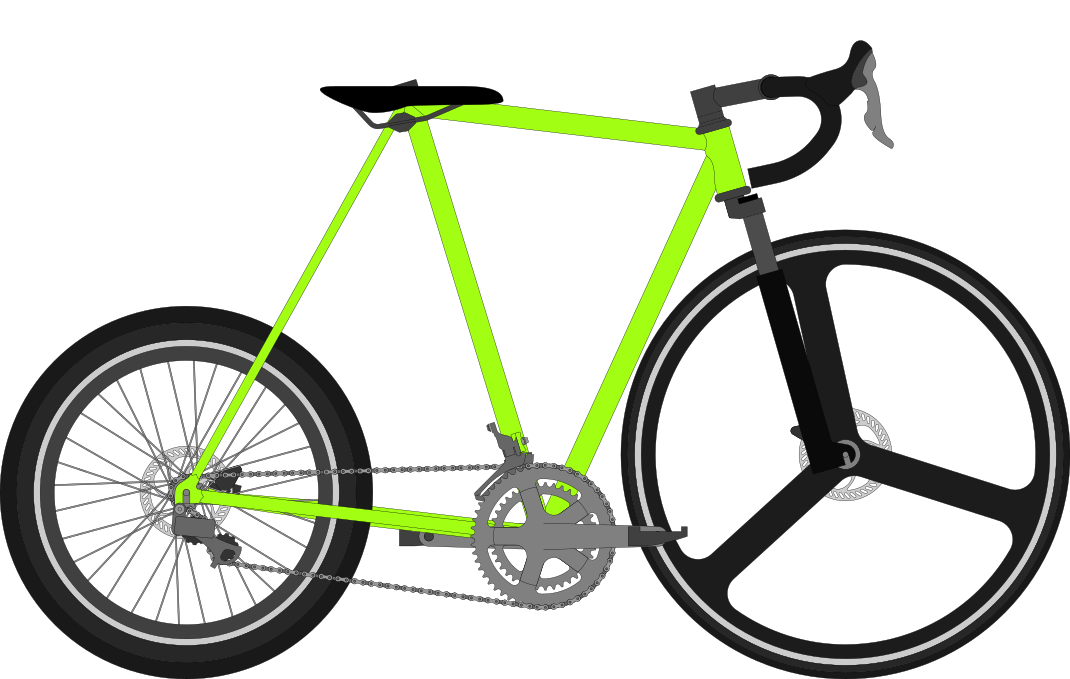

In [ ]:
data1 = samples_oh.iloc[0]
res = renderer.render_clip(data1)
svg = res.image_bytes
from IPython.display import SVG, display
display(SVG(svg))

In [ ]:
from bikebench.validation.base_validation_function import construct_tensor_validator, construct_dataframe_validator

def sample_n(n=4096):
    save_path = models_and_scalers_path("CTGAN.pkl")
    synthesizer = CTGANSynthesizer.load(filepath=save_path)
    sample_datapoint = synthesizer.sample(num_rows=1)
    sample_datapoint_oh = encode_to_continuous(sample_datapoint)
    COLUMN_NAMES = list(sample_datapoint_oh.columns)
    tensor_validator, validation_names = construct_tensor_validator(bike_bench_validation_functions, COLUMN_NAMES)

    all_valid_samples = None
    while True:
        synthetic_collapsed = synthesizer.sample(num_rows=10000)
        samples_oh = encode_to_continuous(synthetic_collapsed)
        samples_oh_tens = torch.tensor(samples_oh.values, dtype=torch.float32)

        validity = tensor_validator(samples_oh_tens)

        valid = torch.all(validity<=0, dim=1)
        valid_subset = samples_oh_tens[valid, :]
        if all_valid_samples is None:
            all_valid_samples = valid_subset
        else:
            all_valid_samples = torch.cat((all_valid_samples, valid_subset), dim=0)
        if all_valid_samples.shape[0] >= n:
            break
    all_valid_samples = all_valid_samples[:n, :]
    samples_df = pd.DataFrame(all_valid_samples.numpy(), columns=COLUMN_NAMES)
    return samples_df

def sample_n_df(n=4096):
    data = sample_n(n)
    return data

df = sample_n_df(256)

/home/mileva/mambaforge/envs/bike-bench-cuda/lib/python3.10/site-packages/sdv/_utils.py:500: FutureWarning: The 'load' function will be deprecated in future versions of SDV. Please use 'utils.load_synthesizer' instead.
  warnings.warn(


torch.Size([1113, 90])


In [ ]:
df

,Seatpost LENGTH,CS textfield,BB textfield,Stack,Head angle,Head tube length textfield,Seat stay junction0,Seat tube length,Seat angle,DT Length,...,Handlebar style OHCLASS: 2,Stem kind OHCLASS: 0,Stem kind OHCLASS: 1,Stem kind OHCLASS: 2,Fork type OHCLASS: 0,Fork type OHCLASS: 1,Fork type OHCLASS: 2,Seat tube type OHCLASS: 0,Seat tube type OHCLASS: 1,Seat tube type OHCLASS: 2
0,304.373383,442.639282,71.926628,549.408997,69.481743,151.662476,44.824532,458.918884,76.477150,631.169250,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,270.821625,409.504181,50.689491,593.796997,75.432404,117.101143,291.612579,532.939209,74.662498,815.635559,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,212.300705,396.858826,67.279694,582.389099,73.392769,160.292648,408.856018,578.724243,79.529015,648.343445,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,495.211853,410.137421,2.336860,487.436249,71.203140,102.238937,47.320477,478.628418,73.113556,647.571228,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,300.005432,409.938049,67.823898,576.126953,77.267609,190.015991,48.922066,562.942017,73.882057,643.977112,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,305.406616,408.707184,61.064625,488.982330,69.372139,170.027954,10.196827,568.828674,86.260139,656.089111,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
252,390.812714,423.448456,71.899857,554.725281,73.269234,110.837059,61.024887,505.204956,73.849915,657.897095,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
253,210.399811,405.930023,67.790833,517.142761,73.211548,156.358383,49.485466,527.639038,74.351212,661.590515,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
254,298.851990,452.361115,65.621559,610.873108,64.082657,252.851257,400.296875,486.999939,73.769485,671.143738,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
